In [53]:
# General libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch
import seaborn as sns

# Machine Learning and Forecasting
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from statsmodels.tsa.seasonal import seasonal_decompose

# Time Series Forecasting
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

# Clustering and Dimensionality Reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Miscellaneous
import warnings
warnings.filterwarnings("ignore")




# Exploratory Data Analysis: Team Stats

In this section, we analyze team-level data from the La Liga 2023/24 season. The goal is to uncover trends, patterns, and relationships in the data that can guide feature engineering and model building. Key areas of focus include:

- **Performance Metrics:** Goals scored, goals conceded, clean sheets, possession percentages, and more.
- **Offensive Metrics:** Expected goals (xG), shots on target, and big chances created.
- **Defensive Metrics:** Tackles, interceptions, and goals conceded.
- **Discipline:** Fouls committed, yellow cards, and red cards.
- **Overall Ratings:** FotMob team ratings and standings.

Below, we explore the distribution of each metric, compare team performance, and identify potential outliers or anomalies.


In [54]:
# Define the directory containing the datasets
dataset_dir = "team_stats"

# Setting Up Initial Dataframes for La Liga Team Analysis

## Introduction
To effectively analyze La Liga team performance for the 2023/24 season, the data will be grouped into three key categories: **Offensive Stats**, **Defensive Stats**, and **Overall Team Rankings**. These categories will allow for a focused investigation into team strengths and weaknesses, as well as comprehensive comparisons across various performance metrics.

---

## Offensive Stats
The following files are associated with offensive performance metrics:
- **`team_goals_per_match.csv`**: Goals scored per match.
- **`big_chance_team.csv`**: Big chances created.
- **`accurate_cross_team.csv`**: Accuracy of crosses.
- **`accurate_pass_team.csv`**: Passing accuracy.
- **`possession_percentage_team.csv`**: Possession statistics.
- **`touches_in_opp_box_team.csv`**: Touches in the opponent's box.
- **`ontarget_scoring_att_team.csv`**: Shots on target and shot conversion rate.
- **`corner_taken_team.csv`**: Corners taken.
- **`penalty_won_team.csv`**: Penalties won.

### Plan:
These files will be merged into a single dataframe using the `Team` column to create a comprehensive offensive stats dataset.

---


In [55]:
# Offensive stats files
offensive_files = [
    'team_goals_per_match.csv', 'big_chance_team.csv', 'accurate_cross_team.csv',
    'accurate_pass_team.csv', 'possession_percentage_team.csv', 'touches_in_opp_box_team.csv',
    'ontarget_scoring_att_team.csv', 'corner_taken_team.csv', 'penalty_won_team.csv'
]



## Defensive Stats
The following files are associated with defensive performance metrics:
- **`clean_sheet_team.csv`**: Clean sheets by teams.
- **`effective_clearance_team.csv`**: Clearances made.
- **`interception_team.csv`**: Interceptions per match.
- **`won_tackle_team.csv`**: Successful tackles.
- **`goals_conceded_team_match.csv`**: Goals conceded per match.
- **`expected_goals_conceded_team.csv`**: Expected goals conceded.
- **`penalty_conceded_team.csv`**: Penalties conceded.
- **`total_red_card_team.csv`**: Red card counts.
- **`total_yel_card_team.csv`**: Yellow card counts.

### Plan:
These files will be merged into a single dataframe using the `Team` column to create a comprehensive defensive stats dataset.

---


In [56]:
# Defensive stats files
defensive_files = [
    'clean_sheet_team.csv', 'effective_clearance_team.csv', 'interception_team.csv',
    'won_tackle_team.csv', 'goals_conceded_team_match.csv', 'expected_goals_conceded_team.csv',
    'penalty_conceded_team.csv', 'total_red_card_team.csv', 'total_yel_card_team.csv'
]


## Overall Team Rankings
The following files provide team-level rankings and performance metrics:
- **`Laliga_table_2023_24.csv`**: Overall rankings, matches played, wins, losses, points.
- **`Laliga_table_home_2023_24.csv`**: Home performance.
- **`Laliga_table_away_2023_24.csv`**: Away performance.
- **`Laliga_table_xg_2023_24.csv`**: Expected goals (xG) and expected points.

### Plan:
These files will be merged into a single dataframe to facilitate overall team performance comparisons.

---

In [57]:
# Overall team rankings files
ranking_files = [
    'Laliga_table_2023_24.csv', 'Laliga_table_home_2023_24.csv',
    'Laliga_table_away_2023_24.csv', 'Laliga_table_xg_2023_24.csv'
]

---

## Next Steps
The three resulting dataframes (**Offensive Stats**, **Defensive Stats**, and **Overall Team Rankings**) will provide a structured basis for exploratory data analysis (EDA), feature engineering, and machine learning applications. The `Team` column will serve as the key for merging these datasets.

---

In [58]:
# Update dataset directory to match the actual structure
dataset_dir = "FIFA_datasets/laliga2023_34/team_stats"

# Initialize empty dataframes
offensive_df = pd.DataFrame()
defensive_df = pd.DataFrame()
ranking_df = pd.DataFrame()

# Offensive files
offensive_files = [
    'team_goals_per_match.csv', 'ontarget_scoring_att_team.csv', 'accurate_pass_team.csv',
    'accurate_cross_team.csv', 'accurate_long_balls_team.csv', 'big_chance_team.csv',
    'touches_in_opp_box_team.csv', 'possession_percentage_team.csv', 'possession_won_att_3rd_team.csv'
]

# Defensive files
defensive_files = [
    'clean_sheet_team.csv', 'effective_clearance_team.csv', 'interception_team.csv',
    'won_tackle_team.csv', 'penalty_conceded_team.csv', 'goals_conceded_team_match.csv',
    'expected_goals_conceded_team.csv', 'total_red_card_team.csv', 'total_yel_card_team.csv'
]

# Ranking files
ranking_files = [
    'Laliga_table_2023_24.csv', 'Laliga_table_home_2023_24.csv', 'Laliga_table_away_2023_24.csv',
    'Laliga_table_xg_2023_24.csv', 'team_ratings.csv'
]

# Merge offensive stats
for file_name in offensive_files:
    file_path = os.path.join(dataset_dir, file_name)
    try:
        temp_df = pd.read_csv(file_path)
        if 'Team' in temp_df.columns:
            if offensive_df.empty:
                offensive_df = temp_df
            else:
                offensive_df = offensive_df.merge(temp_df, on='Team', how='left', suffixes=('', f'_{file_name.split(".")[0]}'))
    except FileNotFoundError:
        print(f"File not found: {file_path}")

# Merge defensive stats
for file_name in defensive_files:
    file_path = os.path.join(dataset_dir, file_name)
    try:
        temp_df = pd.read_csv(file_path)
        if 'Team' in temp_df.columns:
            if defensive_df.empty:
                defensive_df = temp_df
            else:
                defensive_df = defensive_df.merge(temp_df, on='Team', how='left', suffixes=('', f'_{file_name.split(".")[0]}'))
    except FileNotFoundError:
        print(f"File not found: {file_path}")

# Merge overall team rankings
for file_name in ranking_files:
    file_path = os.path.join(dataset_dir, file_name)
    try:
        temp_df = pd.read_csv(file_path)
        if 'name' in temp_df.columns:  # Adjusting for different column name
            temp_df.rename(columns={'name': 'Team'}, inplace=True)
        if ranking_df.empty:
            ranking_df = temp_df
        else:
            ranking_df = ranking_df.merge(temp_df, on='Team', how='left', suffixes=('', f'_{file_name.split(".")[0]}'))
    except FileNotFoundError:
        print(f"File not found: {file_path}")

# Drop duplicate columns after merging
def drop_duplicate_columns(df):
    cols = pd.Series(df.columns)
    for dup in cols[cols.duplicated()].unique():
        df.drop(columns=[dup], inplace=True, errors='ignore')
    return df

# Apply duplicate removal to all dataframes
offensive_df = drop_duplicate_columns(offensive_df)
defensive_df = drop_duplicate_columns(defensive_df)
ranking_df = drop_duplicate_columns(ranking_df)

In [59]:
offensive_df.head(21)

Rank              Team  Goals per Match  Total Goals Scored  Matches  \
0      1       Real Madrid              2.3                87.0       38   
1      2            Girona              2.2                85.0       38   
2      3         Barcelona              2.1                79.0       38   
3      4   Atletico Madrid              1.8                70.0       38   
4      5        Villarreal              1.7                65.0       38   
5      6     Athletic Club              1.6                61.0       38   
6      7     Real Sociedad              1.3                51.0       38   
7      8        Real Betis              1.3                48.0       38   
8      8           Sevilla              1.3                48.0       38   
9     10        Celta Vigo              1.2                46.0       38   
10    11           Osasuna              1.2                45.0       38   
11    12           Almeria              1.1                43.0       38   
12    13            Getafe              1.1                42.0       38   
13    14          Valencia              1.1                40.0       38   
14    15           Granada              1.0                38.0       38   
15    16  Deportivo Alaves              0.9                36.0       38   
16    17        Las Palmas              0.9                33.0       38   
17    17          Mallorca              0.9                33.0       38   
18    19    Rayo Vallecano              0.8                29.0       38   
19    20             Cadiz              0.7                26.0       38   

   Country  Rank_ontarget_scoring_att_team  Shots on Target per Match  \
0      ESP                               1                        6.6   
1      ESP                               4                        5.1   
2      ESP                               2                        6.1   
3      ESP                               3                        5.4   
4      ESP                               5                        4.5   
5      ESP                               6                        4.5   
6      ESP                              12                        4.1   
7      ESP                              13                        4.1   
8      ESP                               9                        4.3   
9      ESP                              10                        4.2   
10     ESP                              17                        3.4   
11     ESP                               7                        4.4   
12     ESP                              11                        4.2   
13     ESP                              16                        3.5   
14     ESP                              18                        3.4   
15     ESP                              14                        3.9   
16     ESP                              19                        3.3   
17     ESP                              15                        3.6   
18     ESP                               8                        4.4   
19     ESP                              20                        3.2   

    Shot Conversion Rate (%)  Matches_ontarget_scoring_att_team  ...  \
0                       14.6                                 38  ...   
1                       17.6                                 38  ...   
2                       13.3                                 38  ...   
3                       14.6                                 38  ...   
4                       13.9                                 38  ...   
5                       13.2                                 38  ...   
6                       11.1                                 38  ...   
7                        9.8                                 38  ...   
8                        9.8                                 38  ...   
9                        9.8                                 38  ...   
10                      10.6                                 38  ...   
11       

In [60]:
# Set the 'Rank' column as the index
defensive_df.set_index('Rank', inplace=True)
offensive_df.set_index('Rank', inplace=True)

# Set the 'idx' column as the index
ranking_df.set_index('idx', inplace=True)

In [61]:
# Split the scoresStr column into Goals For and Goals Against
scores_split = ranking_df['scoresStr'].str.split('-', expand=True)

# Insert Goals For and Goals Against in the correct positions
ranking_df.insert(ranking_df.columns.get_loc('scoresStr') + 1, 'Goals For', scores_split[0].astype(int))
ranking_df.insert(ranking_df.columns.get_loc('scoresStr') + 2, 'Goals Against', scores_split[1].astype(int))



In [62]:
# Drop the unnecessary country columns from the offensive dataframe
offensive_df = offensive_df.drop(columns=[
    'Country', 'Matches_accurate_cross_team', 
    'Matches_accurate_long_balls_team',
    'Country_big_chance_team',
    'Country_accurate_cross_team',
    'Country_ontarget_scoring_att_team',
    'Country_accurate_long_balls_team',
    'Country_touches_in_opp_box_team', 
    'Country_possession_percentage_team', 
    'Country_possession_won_att_3rd_team',
    'Country_accurate_pass_team',
    'Matches',
    'Matches_ontarget_scoring_att_team',
    'Matches_touches_in_opp_box_team',
    'Matches_possession_percentage_team',
    'Matches_possession_won_att_3rd_team',
    'Matches_accurate_pass_team',
    'Matches_big_chance_team'
])


defensive_df = defensive_df.drop(columns=[
    'Country',
    'Matches','Matches_effective_clearance_team', 
    'Matches_won_tackle_team', 
    'Matches_penalty_conceded_team',
    'Country_effective_clearance_team',
    'Country_interception_team',
    'Country_won_tackle_team',
    'Country_penalty_conceded_team',
    'Country_goals_conceded_team_match',
    'Country_expected_goals_conceded_team',
    'Country_total_red_card_team', 
    'Country_total_yel_card_team',
    'Matches_interception_team',
    'Matches_expected_goals_conceded_team',
    'Matches_total_red_card_team',
    'Matches_total_yel_card_team',
    'Matches_goals_conceded_team_match'
])



ranking_df = ranking_df.drop(columns=[
    'Country',
    'played_Laliga_table_xg_2023_24',
    'Matches',
    'played',
    'Rank',
    'pts_Laliga_table_xg_2023_24',
    'scoresStr'
])


In [63]:
offensive_df.head()

Team  Goals per Match  Total Goals Scored  \
Rank                                                         
1         Real Madrid              2.3                87.0   
2              Girona              2.2                85.0   
3           Barcelona              2.1                79.0   
4     Atletico Madrid              1.8                70.0   
5          Villarreal              1.7                65.0   

      Rank_ontarget_scoring_att_team  Shots on Target per Match  \
Rank                                                              
1                                  1                        6.6   
2                                  4                        5.1   
3                                  2                        6.1   
4                                  3                        5.4   
5                                  5                        4.5   

      Shot Conversion Rate (%)  Rank_accurate_pass_team  \
Rank                                                      
1                         14.6                        1   
2                         17.6                        4   
3                         13.3                        2   
4                         14.6                        5   
5                         13.9                        7   

      Accurate Passes per Match  Pass Success (%)  Rank_accurate_cross_team  \
Rank                                                                          
1                         549.2              90.1                        16   
2                         469.8              87.9                         7   
3                         539.5              88.6                         8   
4                         425.3              84.6                        18   
5                         378.8              84.2                        10   

      ...  Rank_big_chance_team  Big Chances  Goals  \
Rank  ...                                             
1     ...                     3        123.0   87.0   
2     ...                     1        131.0   85.0   
3     ...                     2        127.0   79.0   
4     ...                     4        121.0   70.0   
5     ...                     6         92.0   65.0   

      Rank_touches_in_opp_box_team  Touches in Opposition Box  \
Rank                                                            
1                                1                     1259.0   
2                                3                     1048.0   
3                                2                     1177.0   
4                                4                     1012.0   
5                                7                      910.0   

      Rank_possession_percentage_team  Possession (%)  \
Rank                                                    
1                                   3            59.4   
2                                   4            57.2   
3                                   1            64.7   
4                                   6            50.7   
5                                  10            49.6   

      Rank_possession_won_att_3rd_team  Possession Won Final 3rd per Match  \
Rank                                                                         
1                                    2                                 4.7   
2                                   17                                 3.6   
3                                    5                                 4.5   
4                                    6                                 4.5   
5                                   12                                 4.0   

      Total Possessions Won  
Rank                         
1                     781.0  
2                     746.0  
3                     811.0  
4                     801.0  
5                     711.0  

[5 rows x 25 columns]

In [64]:
defensive_df.head()
defensive_df.columns

Index(['Team', 'Clean Sheets', 'Rank_effective_clearance_team',
       'Clearances per Match', 'Total Clearances', 'Rank_interception_team',
       'Interceptions per Match', 'Total Interceptions',
       'Rank_won_tackle_team', 'Successful Tackles per Match',
       'Tackle Success (%)', 'Rank_penalty_conceded_team',
       'Penalties Conceded', 'Penalty Goals Conceded',
       'Rank_goals_conceded_team_match', 'Goals Conceded per Match',
       'Total Goals Conceded', 'Rank_expected_goals_conceded_team',
       'Expected Goals Conceded', 'Goals Conceded', 'Rank_total_red_card_team',
       'Red Cards', 'Yellow Cards', 'Rank_total_yel_card_team',
       'Yellow Cards_total_yel_card_team', 'Red Cards_total_yel_card_team'],
      dtype='object')

In [65]:

# Define the new order of columns
fifa_style_columns = [
    'Team', 'wins', 'draws', 'losses','pts',  'Goals For', 'Goals Against',
    'goalConDiff',
    'wins_Laliga_table_home_2023_24', 'draws_Laliga_table_home_2023_24',
    'losses_Laliga_table_home_2023_24', 'goalConDiff_Laliga_table_home_2023_24',
    'pts_Laliga_table_home_2023_24', 'pts_Laliga_table_away_2023_24', 'wins_Laliga_table_away_2023_24',
    'draws_Laliga_table_away_2023_24', 'losses_Laliga_table_away_2023_24',
    'goalConDiff_Laliga_table_away_2023_24',
    'xPoints', 'xg','xgDiff', 'xgConceded', 'xgConcededDiff',
    'FotMob Team Rating'
]

# Rearrange the columns
ranking_df = ranking_df[fifa_style_columns]

# Display the rearranged dataframe
ranking_df.head()

Team  wins  draws  losses  pts  Goals For  Goals Against  \
idx                                                                        
1        Real Madrid    29      8       1   95         87             26   
2          Barcelona    26      7       5   85         79             44   
3             Girona    25      6       7   81         85             46   
4    Atletico Madrid    24      4      10   76         70             43   
5      Athletic Club    19     11       8   68         61             37   

     goalConDiff  wins_Laliga_table_home_2023_24  \
idx                                                
1             61                              16   
2             35                              15   
3             39                              15   
4             27                              16   
5             24                              12   

     draws_Laliga_table_home_2023_24  ...  wins_Laliga_table_away_2023_24  \
idx                                   ...                                   
1                                  3  ...                              13   
2                                  1  ...                              11   
3                                  2  ...                              10   
4                                  1  ...                               8   
5                                  6  ...                               7   

     draws_Laliga_table_away_2023_24  losses_Laliga_table_away_2023_24  \
idx                                                                      
1                                  5                                 1   
2                                  6                                 2   
3                                  4                                 5   
4                                  3                                 8   
5                                  5                                 7   

     goalConDiff_Laliga_table_away_2023_24    xPoints       xg   xgDiff  \
idx                                                                       
1                                       22  74.505690  69.7642  17.2358   
2                                       13  76.865361  78.4744   0.5256   
3                                        6  63.560373  71.8150  13.1850   
4                                        7  67.758065  63.0209   6.9791   
5                                        0  58.832578  53.2360   7.7640   

     xgConceded  xgConcededDiff  FotMob Team Rating  
idx                                                  
1       35.8447         -9.8447                7.26  
2       41.9500          2.0500                7.10  
3       55.3311         -9.3311                7.03  
4       39.8447          3.1553                6.97  
5       41.9482         -4.9482                6.90  

[5 rows x 24 columns]

In [66]:
ranking_df.head()

ranking_df.columns

Index(['Team', 'wins', 'draws', 'losses', 'pts', 'Goals For', 'Goals Against',
       'goalConDiff', 'wins_Laliga_table_home_2023_24',
       'draws_Laliga_table_home_2023_24', 'losses_Laliga_table_home_2023_24',
       'goalConDiff_Laliga_table_home_2023_24',
       'pts_Laliga_table_home_2023_24', 'pts_Laliga_table_away_2023_24',
       'wins_Laliga_table_away_2023_24', 'draws_Laliga_table_away_2023_24',
       'losses_Laliga_table_away_2023_24',
       'goalConDiff_Laliga_table_away_2023_24', 'xPoints', 'xg', 'xgDiff',
       'xgConceded', 'xgConcededDiff', 'FotMob Team Rating'],
      dtype='object')

In [67]:
# Check for null values in offensive dataframe
print("Null values in Offensive DataFrame:")
print(offensive_df.isnull().sum())

# Check for null values in defensive dataframe
print("\nNull values in Defensive DataFrame:")
print(defensive_df.isnull().sum())

# Check for null values in team stats dataframe
print("\nNull values in Team Stats DataFrame:")
print(ranking_df.isnull().sum())

# Summary of DataFrames with Null Counts
dataframes = {
    "Offensive DataFrame": offensive_df,
    "Defensive DataFrame": defensive_df,
    "Team Stats DataFrame": ranking_df
}

null_summary = {}
for name, df in dataframes.items():
    null_summary[name] = df.isnull().sum().sum()

print("\nSummary of Null Values Across DataFrames:")
print(null_summary)


Null values in Offensive DataFrame:
Team                                  0
Goals per Match                       0
Total Goals Scored                    0
Rank_ontarget_scoring_att_team        0
Shots on Target per Match             0
Shot Conversion Rate (%)              0
Rank_accurate_pass_team               0
Accurate Passes per Match             0
Pass Success (%)                      0
Rank_accurate_cross_team              0
Accurate Crosses per Match            0
Cross Success (%)                     0
Rank_accurate_long_balls_team         0
Accurate Long Balls per Match         0
Successful Long Balls (%)             0
Rank_big_chance_team                  0
Big Chances                           0
Goals                                 0
Rank_touches_in_opp_box_team          0
Touches in Opposition Box             0
Rank_possession_percentage_team       0
Possession (%)                        0
Rank_possession_won_att_3rd_team      0
Possession Won Final 3rd per Match    0
Tota

In [68]:
offensive_df.columns

Index(['Team', 'Goals per Match', 'Total Goals Scored',
       'Rank_ontarget_scoring_att_team', 'Shots on Target per Match',
       'Shot Conversion Rate (%)', 'Rank_accurate_pass_team',
       'Accurate Passes per Match', 'Pass Success (%)',
       'Rank_accurate_cross_team', 'Accurate Crosses per Match',
       'Cross Success (%)', 'Rank_accurate_long_balls_team',
       'Accurate Long Balls per Match', 'Successful Long Balls (%)',
       'Rank_big_chance_team', 'Big Chances', 'Goals',
       'Rank_touches_in_opp_box_team', 'Touches in Opposition Box',
       'Rank_possession_percentage_team', 'Possession (%)',
       'Rank_possession_won_att_3rd_team',
       'Possession Won Final 3rd per Match', 'Total Possessions Won'],
      dtype='object')

In [69]:
# Refine data types for defensive_df
defensive_df = defensive_df.astype({
    'Team': 'string',  # Team names as string
    'Clean Sheets': 'int',  # Count metrics as integers
    'Rank_effective_clearance_team': 'int',
    'Clearances per Match': 'float',  # Per-match metrics as float
    'Total Clearances': 'int',
    'Rank_interception_team': 'int',
    'Interceptions per Match': 'float',
    'Total Interceptions': 'int',
    'Rank_won_tackle_team': 'int',
    'Successful Tackles per Match': 'float',
    'Tackle Success (%)': 'float',
    'Rank_penalty_conceded_team': 'int',
    'Penalties Conceded': 'int',
    'Penalty Goals Conceded': 'int',
    'Rank_goals_conceded_team_match': 'int',
    'Goals Conceded per Match': 'float',
    'Total Goals Conceded': 'int',
    'Rank_expected_goals_conceded_team': 'int',
    'Expected Goals Conceded': 'float',
    'Goals Conceded': 'int',
    'Rank_total_red_card_team': 'int',
    'Red Cards': 'int',
    'Yellow Cards': 'int',
    'Rank_total_yel_card_team': 'int',
    'Yellow Cards_total_yel_card_team': 'int',
    'Red Cards_total_yel_card_team': 'int',
})


In [70]:
defensive_df.dtypes

Team                                 string[python]
Clean Sheets                                  int64
Rank_effective_clearance_team                 int64
Clearances per Match                        float64
Total Clearances                              int64
Rank_interception_team                        int64
Interceptions per Match                     float64
Total Interceptions                           int64
Rank_won_tackle_team                          int64
Successful Tackles per Match                float64
Tackle Success (%)                          float64
Rank_penalty_conceded_team                    int64
Penalties Conceded                            int64
Penalty Goals Conceded                        int64
Rank_goals_conceded_team_match                int64
Goals Conceded per Match                    float64
Total Goals Conceded                          int64
Rank_expected_goals_conceded_team             int64
Expected Goals Conceded                     float64
Goals Conced

In [71]:
# Refine data types for ranking_df
ranking_df = ranking_df.astype({
    'Team': 'string',  # Team names as string
    'wins': 'int',  # Count metrics as integers
    'draws': 'int',
    'losses': 'int',
    'pts': 'int',
    'Goals For': 'int',
    'Goals Against': 'int',
    'goalConDiff': 'int',
    'wins_Laliga_table_home_2023_24': 'int',
    'draws_Laliga_table_home_2023_24': 'int',
    'losses_Laliga_table_home_2023_24': 'int',
    'goalConDiff_Laliga_table_home_2023_24': 'int',
    'pts_Laliga_table_home_2023_24': 'int',
    'pts_Laliga_table_away_2023_24': 'int',
    'wins_Laliga_table_away_2023_24': 'int',
    'draws_Laliga_table_away_2023_24': 'int',
    'losses_Laliga_table_away_2023_24': 'int',
    'goalConDiff_Laliga_table_away_2023_24': 'int',
    'xPoints': 'float',  # Expected points as float
    'xg': 'float',  # Expected goals as float
    'xgDiff': 'float',  # Difference in xG as float
    'xgConceded': 'float',
    'xgConcededDiff': 'float',
    'FotMob Team Rating': 'float',  # Ratings as float
})


In [72]:
ranking_df.dtypes

Team                                     string[python]
wins                                              int64
draws                                             int64
losses                                            int64
pts                                               int64
Goals For                                         int64
Goals Against                                     int64
goalConDiff                                       int64
wins_Laliga_table_home_2023_24                    int64
draws_Laliga_table_home_2023_24                   int64
losses_Laliga_table_home_2023_24                  int64
goalConDiff_Laliga_table_home_2023_24             int64
pts_Laliga_table_home_2023_24                     int64
pts_Laliga_table_away_2023_24                     int64
wins_Laliga_table_away_2023_24                    int64
draws_Laliga_table_away_2023_24                   int64
losses_Laliga_table_away_2023_24                  int64
goalConDiff_Laliga_table_away_2023_24           

In [73]:
# Refined casting for offensive_df
offensive_df = offensive_df.astype({
    'Team': 'string',  # Team names are categorical
    'Goals per Match': 'float',  # Goals per match can have decimals
    'Total Goals Scored': 'int',  # Goals scored are discrete events
    'Rank_ontarget_scoring_att_team': 'int',
    'Shots on Target per Match': 'float',  # Rates can be float
    'Shot Conversion Rate (%)': 'float',  # Percentages remain float
    'Rank_accurate_pass_team': 'int',
    'Accurate Passes per Match': 'int',  # Accurate passes are counts
    'Pass Success (%)': 'float',
    'Rank_accurate_cross_team': 'int',
    'Accurate Crosses per Match': 'int',
    'Cross Success (%)': 'float',
    'Rank_accurate_long_balls_team': 'int',
    'Accurate Long Balls per Match': 'int',
    'Successful Long Balls (%)': 'float',
    'Rank_big_chance_team': 'int',
    'Big Chances': 'int',
    'Goals': 'int',  # Discrete goals
    'Rank_touches_in_opp_box_team': 'int',
    'Touches in Opposition Box': 'int',
    'Rank_possession_percentage_team': 'int',
    'Possession (%)': 'float',
    'Rank_possession_won_att_3rd_team': 'int',
    'Possession Won Final 3rd per Match': 'int',  # Counts
    'Total Possessions Won': 'int'  # Discrete
})

# Confirm updated dtypes
print(offensive_df.dtypes)


Team                                  string[python]
Goals per Match                              float64
Total Goals Scored                             int64
Rank_ontarget_scoring_att_team                 int64
Shots on Target per Match                    float64
Shot Conversion Rate (%)                     float64
Rank_accurate_pass_team                        int64
Accurate Passes per Match                      int64
Pass Success (%)                             float64
Rank_accurate_cross_team                       int64
Accurate Crosses per Match                     int64
Cross Success (%)                            float64
Rank_accurate_long_balls_team                  int64
Accurate Long Balls per Match                  int64
Successful Long Balls (%)                    float64
Rank_big_chance_team                           int64
Big Chances                                    int64
Goals                                          int64
Rank_touches_in_opp_box_team                  

In [74]:
# Function to print row and column counts
def print_shape(df, df_name):
    print(f"{df_name} - Rows: {df.shape[0]}, Columns: {df.shape[1]}")

# Print shapes for the dataframes
print_shape(offensive_df, "Offensive DataFrame")
print_shape(defensive_df, "Defensive DataFrame")
print_shape(ranking_df, "Ranking DataFrame")


Offensive DataFrame - Rows: 20, Columns: 25
Defensive DataFrame - Rows: 20, Columns: 26
Ranking DataFrame - Rows: 20, Columns: 24


## Next Steps in Data Preparation and Exploratory Data Analysis

---

# 1. **Statistical Summary of DataFrames**
We'll explore the basic statistics of our dataframes to understand the ranges, means, and standard deviations of the metrics.

In [75]:
# Function to print a formatted statistical summary
def print_summary(df, df_name):
    print(f"\nStatistical Summary: {df_name}")
    summary = df.describe()
    for col in summary.columns:
        print(f"\nColumn: {col}")
        print(summary[col])

# Statistical Summary of Offensive Metrics
print_summary(offensive_df, "Offensive DataFrame")

# Statistical Summary of Defensive Metrics
print_summary(defensive_df, "Defensive DataFrame")

# Statistical Summary of Team Stats
print_summary(ranking_df, "Ranking DataFrame")



Statistical Summary: Offensive DataFrame

Column: Goals per Match
count    20.00000
mean      1.32500
std       0.47337
min       0.70000
25%       0.97500
50%       1.20000
75%       1.62500
max       2.30000
Name: Goals per Match, dtype: float64

Column: Total Goals Scored
count    20.000000
mean     50.250000
std      18.321328
min      26.000000
25%      37.500000
50%      45.500000
75%      62.000000
max      87.000000
Name: Total Goals Scored, dtype: float64

Column: Rank_ontarget_scoring_att_team
count    20.00000
mean     10.50000
std       5.91608
min       1.00000
25%       5.75000
50%      10.50000
75%      15.25000
max      20.00000
Name: Rank_ontarget_scoring_att_team, dtype: float64

Column: Shots on Target per Match
count    20.000000
mean      4.310000
std       0.908961
min       3.200000
25%       3.575000
50%       4.200000
75%       4.500000
max       6.600000
Name: Shots on Target per Match, dtype: float64

Column: Shot Conversion Rate (%)
count    20.000000
mean 

# 2. **Correlation Analysis**
Examine the relationships between variables to identify potential features for predictive modeling.

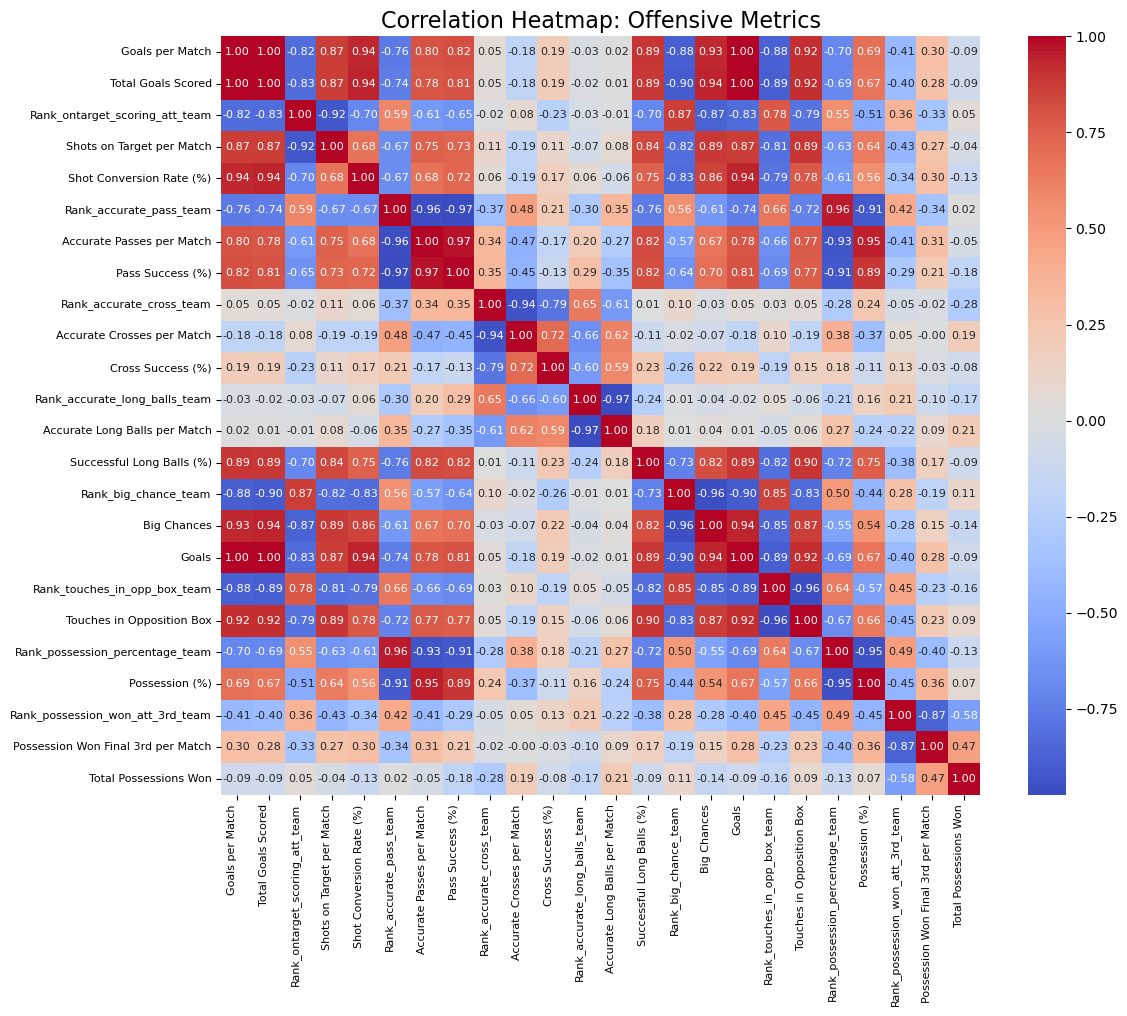

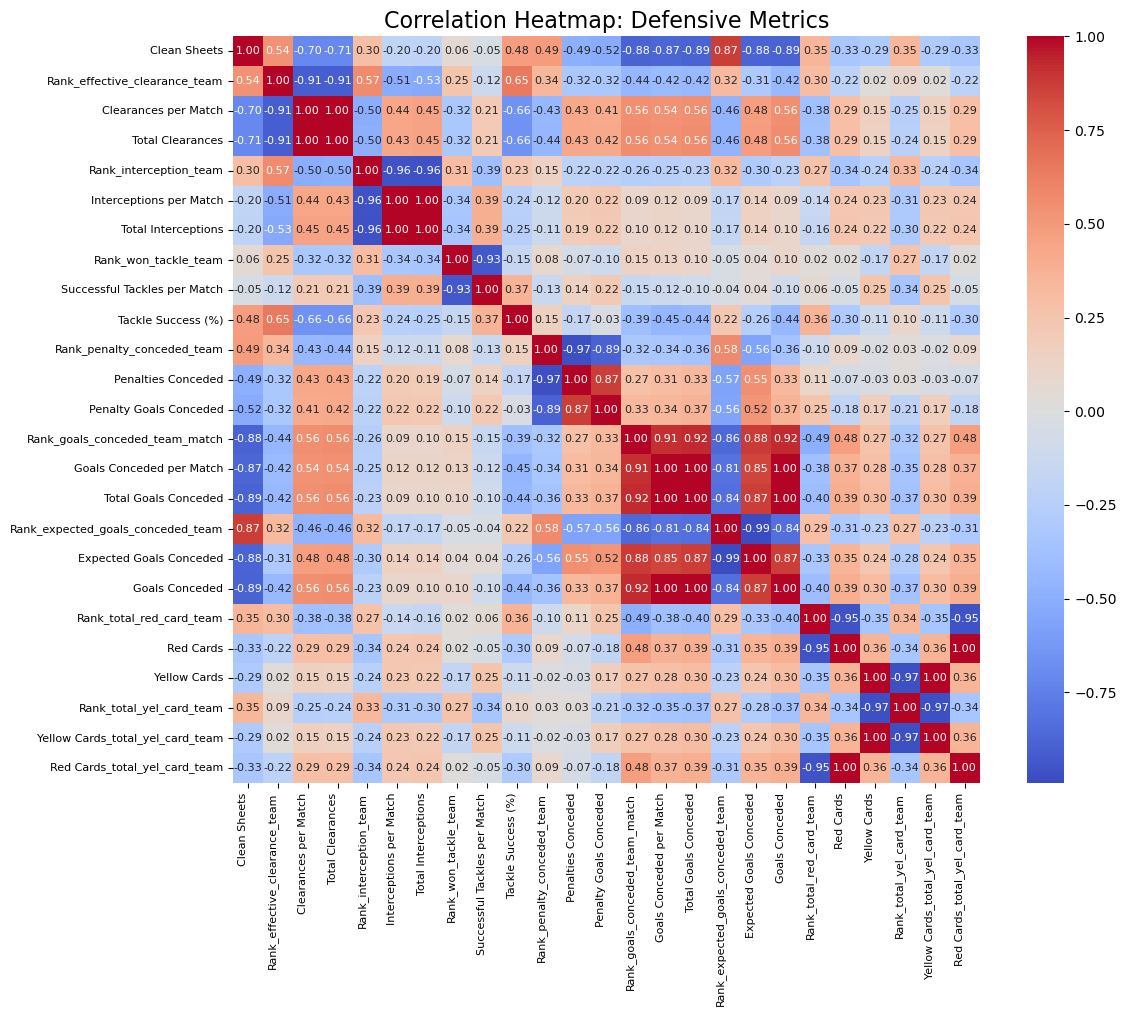

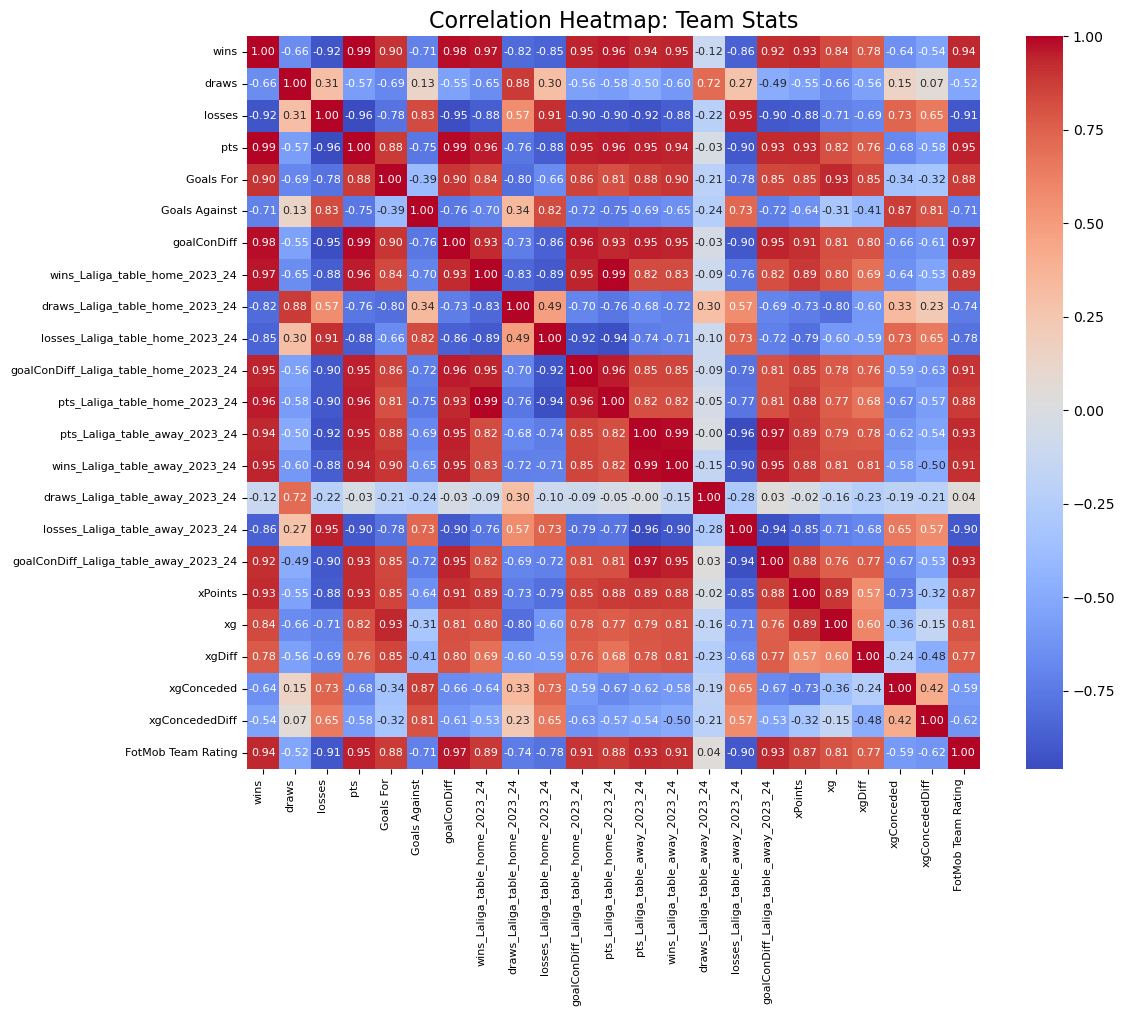

In [76]:
# Function to plot a heatmap for a correlation matrix
def plot_correlation_heatmap(corr_matrix, title):
    plt.figure(figsize=(12, 10))  # Increased figure size for better readability
    sns.heatmap(
        corr_matrix,
        annot=True,
        fmt=".2f",  # Limit to 2 decimal places
        cmap="coolwarm",
        cbar=True,
        square=True,
        annot_kws={"size": 8},  # Reduce font size for annotations
    )
    plt.title(title, fontsize=16)
    plt.xticks(rotation=90, ha='right', fontsize=8)  # Adjust x-tick rotation and font size
    plt.yticks(fontsize=8)  # Adjust y-tick font size
    plt.tight_layout()
    plt.show()

# Correlation Heatmap for Offensive Metrics
offensive_corr = offensive_df.select_dtypes(include=['number']).corr()
plot_correlation_heatmap(offensive_corr, "Correlation Heatmap: Offensive Metrics")

# Correlation Heatmap for Defensive Metrics
defensive_corr = defensive_df.select_dtypes(include=['number']).corr()
plot_correlation_heatmap(defensive_corr, "Correlation Heatmap: Defensive Metrics")

# Correlation Heatmap for Team Stats
ranking_corr = ranking_df.select_dtypes(include=['number']).corr()
plot_correlation_heatmap(ranking_corr, "Correlation Heatmap: Team Stats")



# 3. **Feature Selection**

## Feature Selection Based on Heatmap Insights

After reviewing the correlation heatmaps for **Offensive Metrics**, **Defensive Metrics**, and **Team Stats**, here is the analysis and proposed feature selection:

---

## 1. Offensive Metrics Heatmap

### Key Observations:
- **Goals per Match** is strongly correlated with:
  - **Total Goals Scored**
  - **Big Chances**
  - **Touches in Opposition Box**
- **Possession (%)** and **Possession Won Final 3rd per Match** show moderate correlations with **Goals per Match**, indicating indirect influence.
- Rank-based features (e.g., `Rank_ontarget_scoring_att_team`) are categorical and less meaningful for numerical analysis.

### Proposed Features:
Retain continuous metrics with high correlations:
- `Goals per Match`
- `Total Goals Scored`
- `Big Chances`
- `Touches in Opposition Box`
- `Possession (%)`
- `Possession Won Final 3rd per Match`

Remove categorical rank-based features:
- `Rank_*`

---

## 2. Defensive Metrics Heatmap

### Key Observations:
- **Clean Sheets** has strong negative correlations with:
  - **Goals Conceded**
  - **Expected Goals Conceded**
  - **Total Goals Conceded**
- **Expected Goals Conceded** and **Goals Conceded** are tightly linked, so both may not be necessary for modeling.
- **Red Cards** and **Yellow Cards** have weaker correlations with other defensive metrics.

### Proposed Features:
Keep critical defensive features:
- `Clean Sheets`
- `Goals Conceded`
- `Expected Goals Conceded`
- `Interceptions per Match`
- `Successful Tackles per Match`

Exclude features with weak correlations or redundancy:
- `Red Cards`, `Yellow Cards`, `Rank_*`

---

## 3. Team Stats Metrics Heatmap

### Key Observations:
- **Points (pts)** is strongly correlated with:
  - **xPoints**
  - **goalConDiff**
  - **Goals For**
- **xg (Expected Goals)** and **xgDiff** are valuable predictors, reflecting team efficiency and performance beyond raw scoring.
- Metrics like **wins**, **draws**, and **losses** are directly tied to overall points but are already represented by other features.

### Proposed Features:
Retain key team-level performance indicators:
- `pts` (Actual Points)
- `xPoints` (Expected Points)
- `goalConDiff`
- `Goals For`
- `Goals Against`
- `xgDiff`
- `xg` (Expected Goals)
- `xgConceded`

Remove redundant or repetitive features:
- `wins_Laliga_table_home_2023_24`
- `pts_Laliga_table_home_2023_24`

---

## Next Steps
1. **Streamline Datasets**:
   - Reduce features in Offensive, Defensive, and Team Stats datasets to focus on relevant metrics.
2. **Clustering and Segmentation**:
   - Apply clustering techniques (e.g., K-Means, Hierarchical Clustering) to identify team archetypes.
3. **Predictive Analysis**:
   - Develop models to understand key drivers of success (e.g., points earned) or relegation risk.

---


# Streamline Datasets:

In [77]:
# Streamline Offensive DataFrame
offensive_features = [
    'Team', 'Goals per Match', 'Total Goals Scored', 'Shots on Target per Match',
    'Shot Conversion Rate (%)', 'Accurate Passes per Match', 'Pass Success (%)',
    'Accurate Crosses per Match', 'Touches in Opposition Box',
    'Possession (%)', 'Possession Won Final 3rd per Match', 'Total Possessions Won'
]
offensive_df_streamlined = offensive_df[offensive_features]

# Streamline Defensive DataFrame
defensive_features = [
    'Team', 'Clean Sheets', 'Clearances per Match', 'Total Clearances',
    'Interceptions per Match', 'Total Interceptions', 'Successful Tackles per Match',
    'Tackle Success (%)', 'Goals Conceded per Match', 'Total Goals Conceded',
    'Expected Goals Conceded', 'Goals Conceded', 'Red Cards', 'Yellow Cards'
]
defensive_df_streamlined = defensive_df[defensive_features]

# Streamline Ranking DataFrame
ranking_features = [
    'Team', 'wins', 'draws', 'losses', 'Goals For', 'Goals Against',
    'goalConDiff', 'pts', 'xPoints', 'xg', 'xgDiff', 'xgConceded', 'xgConcededDiff',
    'FotMob Team Rating'
]
ranking_df_streamlined = ranking_df[ranking_features]

# Display the heads of the streamlined dataframes

offensive_df_streamlined.head()


Team  Goals per Match  Total Goals Scored  \
Rank                                                         
1         Real Madrid              2.3                  87   
2              Girona              2.2                  85   
3           Barcelona              2.1                  79   
4     Atletico Madrid              1.8                  70   
5          Villarreal              1.7                  65   

      Shots on Target per Match  Shot Conversion Rate (%)  \
Rank                                                        
1                           6.6                      14.6   
2                           5.1                      17.6   
3                           6.1                      13.3   
4                           5.4                      14.6   
5                           4.5                      13.9   

      Accurate Passes per Match  Pass Success (%)  Accurate Crosses per Match  \
Rank                                                                            
1                           549              90.1                           3   
2                           469              87.9                           4   
3                           539              88.6                           4   
4                           425              84.6                           3   
5                           378              84.2                           4   

      Touches in Opposition Box  Possession (%)  \
Rank                                              
1                          1259            59.4   
2                          1048            57.2   
3                          1177            64.7   
4                          1012            50.7   
5                           910            49.6   

      Possession Won Final 3rd per Match  Total Possessions Won  
Rank                                                             
1                                      4                    781  
2                                      3                    746  
3                                      4                    811  
4                                      4                    801  
5                                      4                    711

In [78]:
defensive_df_streamlined.head()

Team  Clean Sheets  Clearances per Match  Total Clearances  \
Rank                                                                          
1         Real Madrid            21                  12.8               486   
2       Athletic Club            18                  15.7               596   
3           Barcelona            17                  14.4               547   
4       Real Sociedad            15                  17.6               670   
5     Atletico Madrid            13                  19.1               726   

      Interceptions per Match  Total Interceptions  \
Rank                                                 
1                         7.8                  296   
2                         7.3                  278   
3                         6.8                  257   
4                         6.7                  253   
5                         6.7                  256   

      Successful Tackles per Match  Tackle Success (%)  \
Rank                                                     
1                              9.7                66.1   
2                              9.5                62.3   
3                              9.6                63.6   
4                             10.7                62.3   
5                             10.5                61.0   

      Goals Conceded per Match  Total Goals Conceded  Expected Goals Conceded  \
Rank                                                                            
1                          0.7                    26                     35.8   
2                          1.0                    37                     41.9   
3                          1.2                    44                     42.0   
4                          1.0                    39                     42.0   
5                          1.1                    43                     39.8   

      Goals Conceded  Red Cards  Yellow Cards  
Rank                                           
1                 26          4            67  
2                 37          5            75  
3                 44          2            85  
4                 39          2            98  
5                 43          5            82

In [79]:
ranking_df_streamlined.head()

Team  wins  draws  losses  Goals For  Goals Against  \
idx                                                                   
1        Real Madrid    29      8       1         87             26   
2          Barcelona    26      7       5         79             44   
3             Girona    25      6       7         85             46   
4    Atletico Madrid    24      4      10         70             43   
5      Athletic Club    19     11       8         61             37   

     goalConDiff  pts    xPoints       xg   xgDiff  xgConceded  \
idx                                                              
1             61   95  74.505690  69.7642  17.2358     35.8447   
2             35   85  76.865361  78.4744   0.5256     41.9500   
3             39   81  63.560373  71.8150  13.1850     55.3311   
4             27   76  67.758065  63.0209   6.9791     39.8447   
5             24   68  58.832578  53.2360   7.7640     41.9482   

     xgConcededDiff  FotMob Team Rating  
idx                                      
1           -9.8447                7.26  
2            2.0500                7.10  
3           -9.3311                7.03  
4            3.1553                6.97  
5           -4.9482                6.90

# Next Steps in Analysis: Preparing for Clustering and Forecasting

Since the focus is on clustering and forecasting based on team performance, we will proceed with the following tasks:

## 1. **Normalization of Features for Clustering**
Clustering algorithms like K-Means require features to be scaled to ensure that all metrics contribute equally to the clustering process. This involves normalizing the offensive, defensive, and ranking features.

## 2. **Performing Clustering**
K-Means clustering will be used to group teams based on their:
- Offensive stats
- Defensive stats
- Overall performance metrics (ranking stats)

Clustering will help in identifying groups of teams with similar playing styles or performance levels.

## 3. **Preparing Data for Forecasting**
Key time-series-related features, such as `xPoints` and `Goals For`, will be transformed and analyzed using ARIMA or similar time-series forecasting models. This step will focus on understanding trends, seasonality, and residuals for better predictive modeling.

---


## 1. **Normalization of Features for Clustering**

In [80]:
offensive_df_streamlined.columns

Index(['Team', 'Goals per Match', 'Total Goals Scored',
       'Shots on Target per Match', 'Shot Conversion Rate (%)',
       'Accurate Passes per Match', 'Pass Success (%)',
       'Accurate Crosses per Match', 'Touches in Opposition Box',
       'Possession (%)', 'Possession Won Final 3rd per Match',
       'Total Possessions Won'],
      dtype='object')

In [81]:
# Normalize Offensive Metrics
offensive_numeric = offensive_df_streamlined.drop('Team', axis=1)
scaler_offensive = StandardScaler()
offensive_scaled = scaler_offensive.fit_transform(offensive_numeric)

print("Offensive Metrics Normalization Complete:")
print(f"Shape of Scaled Offensive Data: {offensive_scaled.shape}")

# Normalize Defensive Metrics
if 'Team' in defensive_df_streamlined.columns:
    defensive_numeric = defensive_df_streamlined.drop('Team', axis=1)
else:
    defensive_numeric = defensive_df_streamlined

scaler_defensive = StandardScaler()
defensive_scaled = scaler_defensive.fit_transform(defensive_numeric)

print("Defensive Metrics Normalization Complete:")
print(f"Shape of Scaled Defensive Data: {defensive_scaled.shape}")

# Normalize Team Stats
if 'Team' in ranking_df_streamlined.columns:
    ranking_numeric = ranking_df_streamlined.drop('Team', axis=1)
else:
    ranking_numeric = ranking_df_streamlined

scaler_ranking = StandardScaler()
ranking_scaled = scaler_ranking.fit_transform(ranking_numeric)

print("Team Stats Normalization Complete:")
print(f"Shape of Scaled Team Stats Data: {ranking_scaled.shape}")


Offensive Metrics Normalization Complete:
Shape of Scaled Offensive Data: (20, 11)
Defensive Metrics Normalization Complete:
Shape of Scaled Defensive Data: (20, 13)
Team Stats Normalization Complete:
Shape of Scaled Team Stats Data: (20, 13)


In [82]:
# Convert scaled arrays back to DataFrames for inspection
offensive_scaled_df = pd.DataFrame(offensive_scaled, columns=offensive_numeric.columns)
defensive_scaled_df = pd.DataFrame(defensive_scaled, columns=defensive_numeric.columns)
ranking_scaled_df = pd.DataFrame(ranking_scaled, columns=ranking_numeric.columns)


In [83]:
# Display the heads of the scaled DataFrames
offensive_scaled_df.head()

Goals per Match  Total Goals Scored  Shots on Target per Match  \
0         2.113208            2.057968                   2.584808   
1         1.896469            1.945970                   0.891702   
2         1.679730            1.609975                   2.020440   
3         1.029512            1.105983                   1.230324   
4         0.812772            0.825987                   0.214460   

   Shot Conversion Rate (%)  Accurate Passes per Match  Pass Success (%)  \
0                  1.341536                   2.132350          1.923201   
1                  2.361716                   1.229051          1.475945   
2                  0.899458                   2.019438          1.618254   
3                  1.341536                   0.732237          0.805061   
4                  1.103494                   0.201549          0.723742   

   Accurate Crosses per Match  Touches in Opposition Box  Possession (%)  \
0                   -1.054093                   2.360180        1.531608   
1                    0.000000                   1.177568        1.173717   
2                    0.000000                   1.900587        2.393798   
3                   -1.054093                   0.975795        0.116314   
4                    0.000000                   0.404106       -0.062631   

   Possession Won Final 3rd per Match  Total Possessions Won  
0                            0.611593              -0.364848  
1                           -1.135815              -0.990813  
2                            0.611593               0.171693  
3                            0.611593              -0.007154  
4                            0.611593              -1.616778

In [84]:
defensive_scaled_df.head()

Clean Sheets  Clearances per Match  Total Clearances  \
0      2.264069             -2.614045         -2.617749   
1      1.574505             -1.292209         -1.299286   
2      1.344650             -1.884756         -1.886601   
3      0.884941             -0.426178         -0.412319   
4      0.425231              0.257530          0.258898   

   Interceptions per Match  Total Interceptions  Successful Tackles per Match  \
0                 0.097241             0.077919                     -0.309082   
1                -0.551031            -0.531880                     -0.538031   
2                -1.199303            -1.243311                     -0.423556   
3                -1.328957            -1.378822                      0.835665   
4                -1.328957            -1.277189                      0.606716   

   Tackle Success (%)  Goals Conceded per Match  Total Goals Conceded  \
0            2.047959                 -1.958151             -2.009096   
1            0.545595                 -1.018239             -1.097753   
2            1.059562                 -0.391630             -0.517808   
3            0.545595                 -1.018239             -0.932055   
4            0.031629                 -0.704934             -0.600657   

   Expected Goals Conceded  Goals Conceded  Red Cards  Yellow Cards  
0                -1.830675       -2.009096  -0.218346     -1.260734  
1                -1.051393       -1.097753   0.266868     -0.774668  
2                -1.038617       -0.517808  -1.188774     -0.167085  
3                -1.038617       -0.932055  -1.188774      0.622772  
4                -1.319670       -0.600657   0.266868     -0.349360

In [85]:
ranking_scaled_df.head()

wins     draws    losses  Goals For  Goals Against  goalConDiff  \
0  2.121990 -0.899500 -2.211231   2.057968      -2.009096     2.421092   
1  1.707269 -1.232649 -1.512028   1.609975      -0.517808     1.389151   
2  1.569029 -1.565797 -1.162426   1.945970      -0.352110     1.547912   
3  1.430788 -2.232094 -0.638023   1.105983      -0.600657     1.071631   
4  0.739586  0.099944 -0.987625   0.601991      -1.097753     0.952561   

        pts   xPoints        xg    xgDiff  xgConceded  xgConcededDiff  \
0  2.183588  2.061788  1.669522  2.112460   -1.826134       -1.534532   
1  1.679877  2.281253  2.410462  0.051017   -1.046109        0.298676   
2  1.478392  1.043801  1.843975  1.612736    0.663487       -1.455376   
3  1.226537  1.434214  1.095898  0.847149   -1.315086        0.469025   
4  0.823568  0.604084  0.263538  0.943978   -1.046339       -0.779884   

   FotMob Team Rating  
0            2.560750  
1            1.626383  
2            1.217597  
3            0.867210  
4            0.458424

# Find the Best Value for k Using the Original Scaled DataFrames.

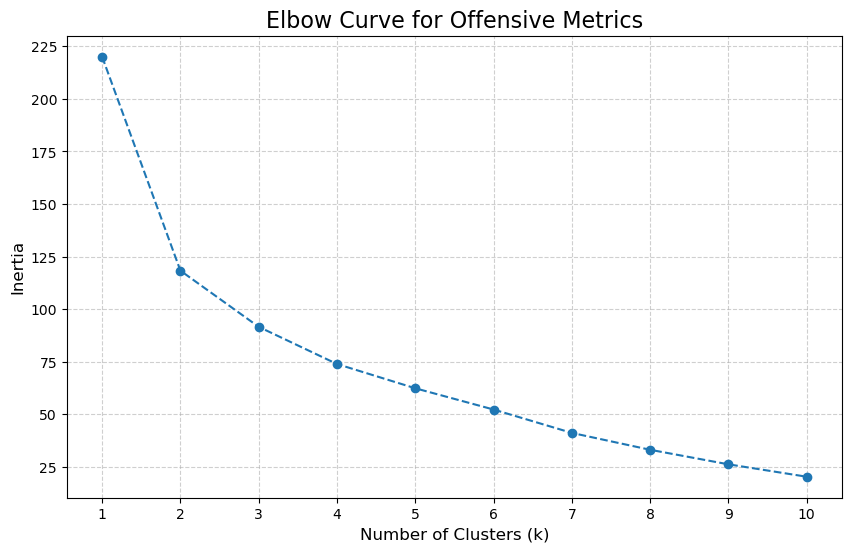

Elbow DataFrame for Offensive Metrics:
    k     inertia
0   1  220.000000
1   2  118.309780
2   3   91.612177
3   4   73.942355
4   5   62.409793
5   6   52.310537
6   7   41.192813
7   8   33.179246
8   9   26.265369
9  10   20.370044


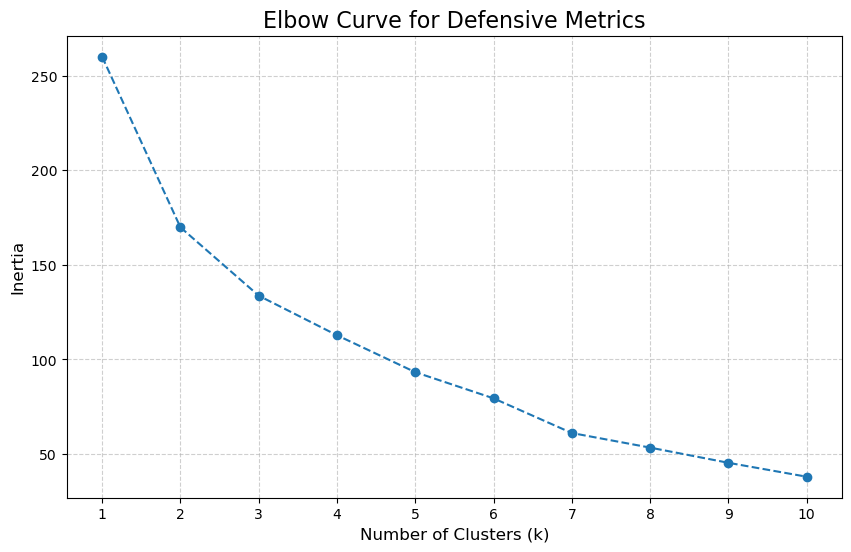

Elbow DataFrame for Defensive Metrics:
    k     inertia
0   1  260.000000
1   2  169.856312
2   3  133.726515
3   4  112.816549
4   5   93.303411
5   6   79.466491
6   7   61.145650
7   8   53.437660
8   9   45.407114
9  10   38.052947


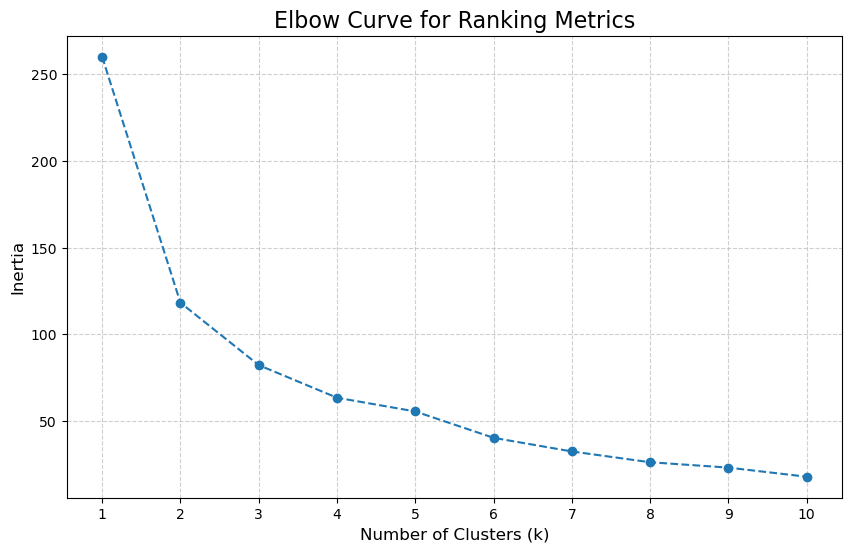

Elbow DataFrame for Ranking Metrics:
    k     inertia
0   1  260.000000
1   2  118.200584
2   3   82.214355
3   4   63.411246
4   5   55.497102
5   6   40.297446
6   7   32.436150
7   8   26.213120
8   9   23.119979
9  10   17.866199


In [86]:
# Function to compute inertia for different k values
def compute_elbow_curve(data_scaled, max_k=10):
    inertia_values = []
    k_values = range(1, max_k + 1)
    
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data_scaled)
        inertia_values.append(kmeans.inertia_)
    
    # Create a DataFrame for the Elbow Data
    elbow_df = pd.DataFrame({'k': k_values, 'inertia': inertia_values})
    return elbow_df

# Compute Elbow Curve for Offensive DataFrame
elbow_offensive = compute_elbow_curve(offensive_scaled, max_k=10)

# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(elbow_offensive['k'], elbow_offensive['inertia'], marker='o', linestyle='--')
plt.title('Elbow Curve for Offensive Metrics', fontsize=16)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.xticks(elbow_offensive['k'])
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Plot the Elbow DataFrame
print("Elbow DataFrame for Offensive Metrics:")
print(elbow_offensive)

# Repeat the process for Defensive and Ranking DataFrames
elbow_defensive = compute_elbow_curve(defensive_scaled, max_k=10)
elbow_ranking = compute_elbow_curve(ranking_scaled, max_k=10)

# Plot the Elbow Curve for Defensive Metrics
plt.figure(figsize=(10, 6))
plt.plot(elbow_defensive['k'], elbow_defensive['inertia'], marker='o', linestyle='--')
plt.title('Elbow Curve for Defensive Metrics', fontsize=16)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.xticks(elbow_defensive['k'])
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Plot the Elbow DataFrame for Defensive Metrics
print("Elbow DataFrame for Defensive Metrics:")
print(elbow_defensive)

# Plot the Elbow Curve for Ranking Metrics
plt.figure(figsize=(10, 6))
plt.plot(elbow_ranking['k'], elbow_ranking['inertia'], marker='o', linestyle='--')
plt.title('Elbow Curve for Ranking Metrics', fontsize=16)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.xticks(elbow_ranking['k'])
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Plot the Elbow DataFrame for Ranking Metrics
print("Elbow DataFrame for Ranking Metrics:")
print(elbow_ranking)


In [87]:
def find_optimal_k_by_percentage_change(elbow_df):
    # Calculate the percentage change in inertia
    elbow_df["percentage_change"] = elbow_df["inertia"].diff() / elbow_df["inertia"].shift(1) * 100

    # Take the absolute value for percentage change
    elbow_df["percentage_change"] = elbow_df["percentage_change"].abs()

    # Find the largest percentage change
    max_change_index = elbow_df["percentage_change"].idxmax()
    optimal_k = elbow_df.loc[max_change_index, "k"]

    # Return the optimal k and the updated DataFrame
    return optimal_k, elbow_df

# For Offensive Metrics
optimal_k_offensive, elbow_offensive_updated = find_optimal_k_by_percentage_change(elbow_offensive)
print(f"Optimal k for Offensive Metrics: {optimal_k_offensive}")
print(elbow_offensive_updated)

# For Defensive Metrics
optimal_k_defensive, elbow_defensive_updated = find_optimal_k_by_percentage_change(elbow_defensive)
print(f"\nOptimal k for Defensive Metrics: {optimal_k_defensive}")
print(elbow_defensive_updated)

# For Ranking Metrics
optimal_k_ranking, elbow_ranking_updated = find_optimal_k_by_percentage_change(elbow_ranking)
print(f"\nOptimal k for Ranking Metrics: {optimal_k_ranking}")
print(elbow_ranking_updated)





Optimal k for Offensive Metrics: 2
    k     inertia  percentage_change
0   1  220.000000                NaN
1   2  118.309780          46.222827
2   3   91.612177          22.565846
3   4   73.942355          19.287634
4   5   62.409793          15.596693
5   6   52.310537          16.182165
6   7   41.192813          21.253317
7   8   33.179246          19.453798
8   9   26.265369          20.837957
9  10   20.370044          22.445238

Optimal k for Defensive Metrics: 2
    k     inertia  percentage_change
0   1  260.000000                NaN
1   2  169.856312          34.670649
2   3  133.726515          21.270800
3   4  112.816549          15.636365
4   5   93.303411          17.296344
5   6   79.466491          14.830026
6   7   61.145650          23.054801
7   8   53.437660          12.605949
8   9   45.407114          15.027878
9  10   38.052947          16.196069

Optimal k for Ranking Metrics: 2
    k     inertia  percentage_change
0   1  260.000000                NaN
1   2  

---

# Clustering with K-means Using the Original Scaled Data

---

In [88]:
# Initialize the K-Means model using the best value for k
# Initialize the K-Means model using the best value for k (replace `best_k` with the optimal k identified earlier)

kmeans = KMeans(n_clusters=2, n_init='auto', random_state=1)

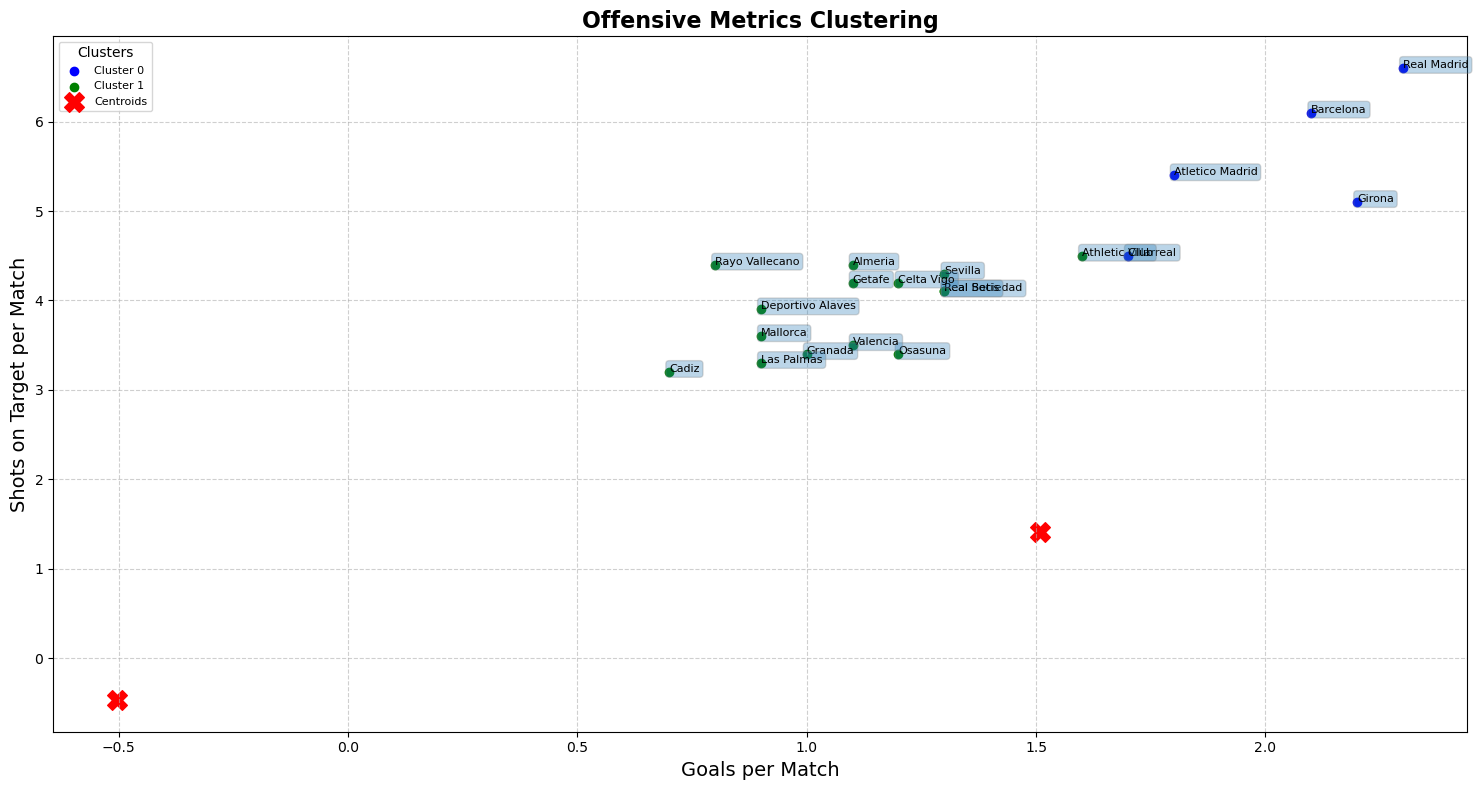

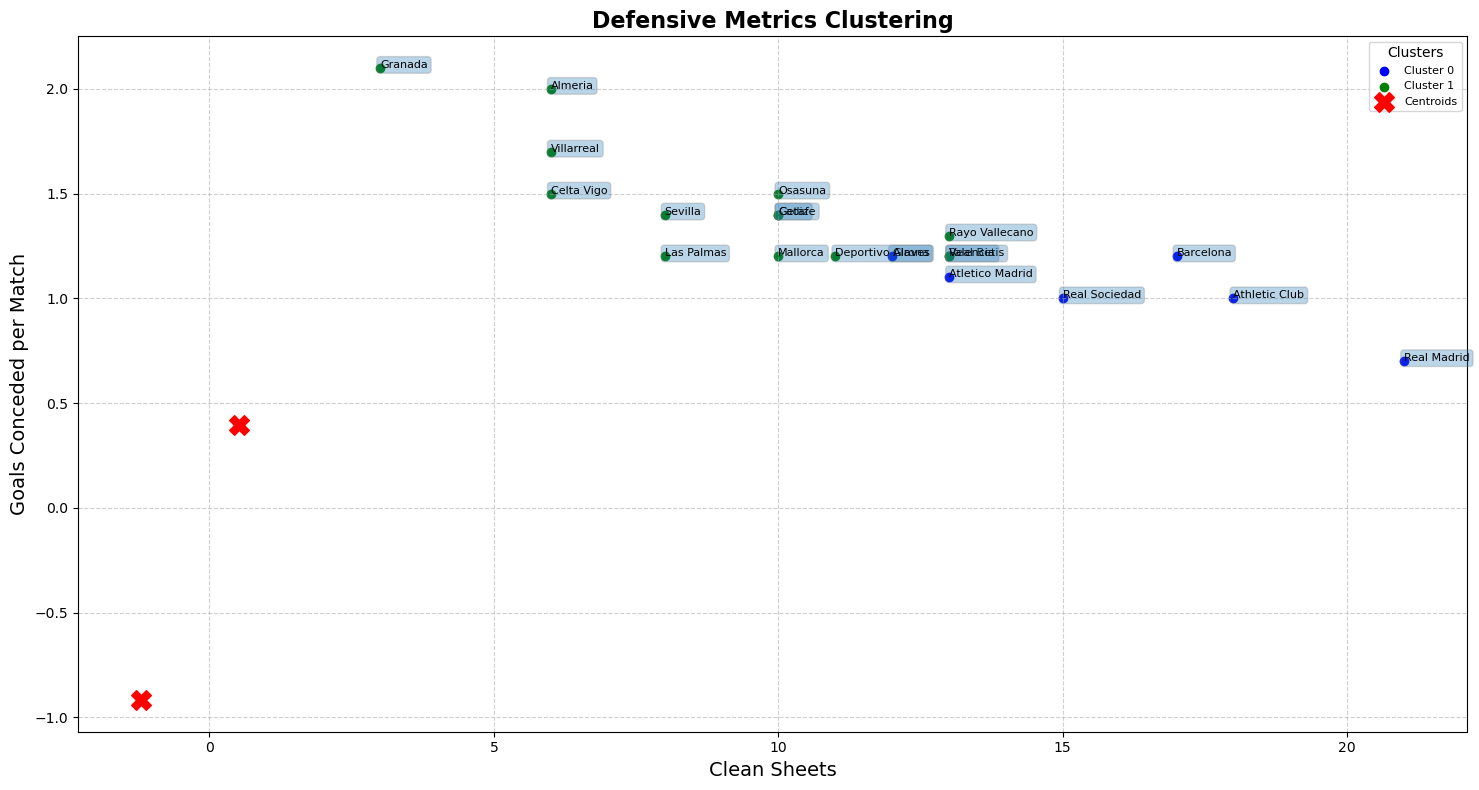

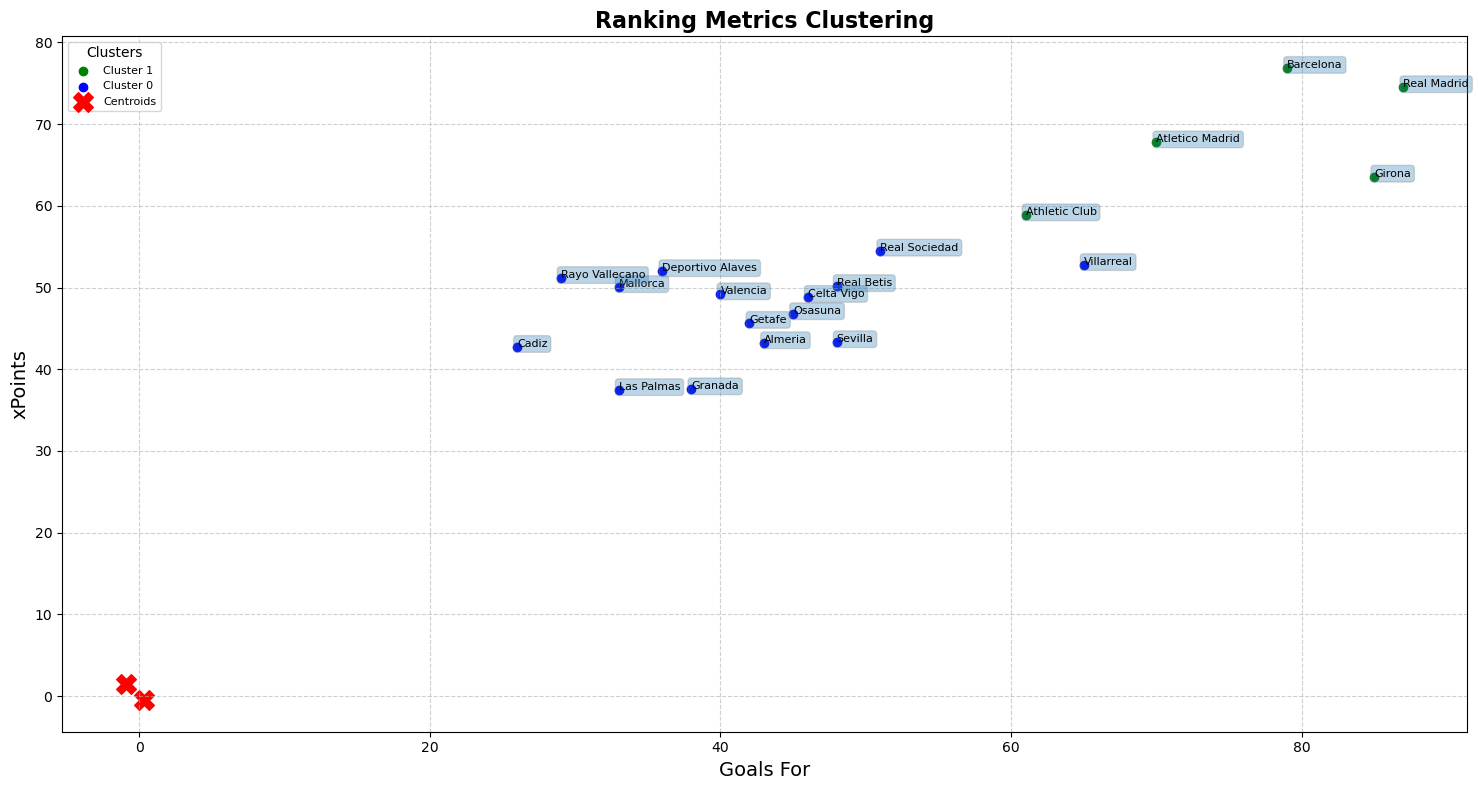

In [89]:
# Enhanced Function for Clustering and Labeling
def kmeans_clustering_with_labels(data_scaled, original_df, k, title, x_col, y_col):
    # Fit the K-Means model
    kmeans = KMeans(n_clusters=k, random_state=1)
    clusters = kmeans.fit_predict(data_scaled)

    # Create a copy of the original DataFrame
    clustered_df = original_df.copy()
    
    # Add the predicted clusters to the DataFrame
    clustered_df['Cluster'] = clusters

    # Scatter plot of the clusters
    plt.figure(figsize=(15, 8))
    cluster_colors = ['blue', 'green', 'orange', 'purple', 'pink']  # Adjust as needed
    for cluster in clustered_df['Cluster'].unique():
        cluster_data = clustered_df[clustered_df['Cluster'] == cluster]
        plt.scatter(
            cluster_data[x_col], 
            cluster_data[y_col], 
            label=f'Cluster {cluster}', 
            color=cluster_colors[cluster % len(cluster_colors)]
        )
    
    # Annotate each point with the team name, using bounding boxes for readability
    for i in range(clustered_df.shape[0]):
        plt.text(
            clustered_df[x_col].iloc[i], 
            clustered_df[y_col].iloc[i], 
            clustered_df['Team'].iloc[i],
            fontsize=8,
            color='black',
            bbox=dict(boxstyle="round,pad=0.3", edgecolor='gray', alpha=0.3)
        )
    
    # Add cluster centroids to the plot
    centroids = kmeans.cluster_centers_
    plt.scatter(
        centroids[:, original_df.columns.get_loc(x_col)], 
        centroids[:, original_df.columns.get_loc(y_col)], 
        color='red', marker='X', s=200, label='Centroids'
    )

    plt.title(title, fontsize=16, weight='bold')
    plt.xlabel(x_col, fontsize=14)
    plt.ylabel(y_col, fontsize=14)
    plt.legend(title='Clusters', fontsize=8)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

    return clustered_df

# Usage for Offensive Metrics Clustering
clustered_offensive_df = kmeans_clustering_with_labels(
    data_scaled=offensive_scaled,
    original_df=offensive_df_streamlined,
    k=2,  # Use the optimal k identified earlier
    title="Offensive Metrics Clustering",
    x_col="Goals per Match",
    y_col="Shots on Target per Match"
)

# Usage for Defensive Metrics Clustering
clustered_defensive_df = kmeans_clustering_with_labels(
    data_scaled=defensive_scaled,
    original_df=defensive_df_streamlined,
    k=2,  # Use the optimal k identified earlier
    title="Defensive Metrics Clustering",
    x_col="Clean Sheets",
    y_col="Goals Conceded per Match"
)

# Usage for Ranking Metrics Clustering
clustered_ranking_df = kmeans_clustering_with_labels(
    data_scaled=ranking_scaled,
    original_df=ranking_df_streamlined,
    k=2,  # Use the optimal k identified earlier
    title="Ranking Metrics Clustering",
    x_col="Goals For",
    y_col="xPoints"
)


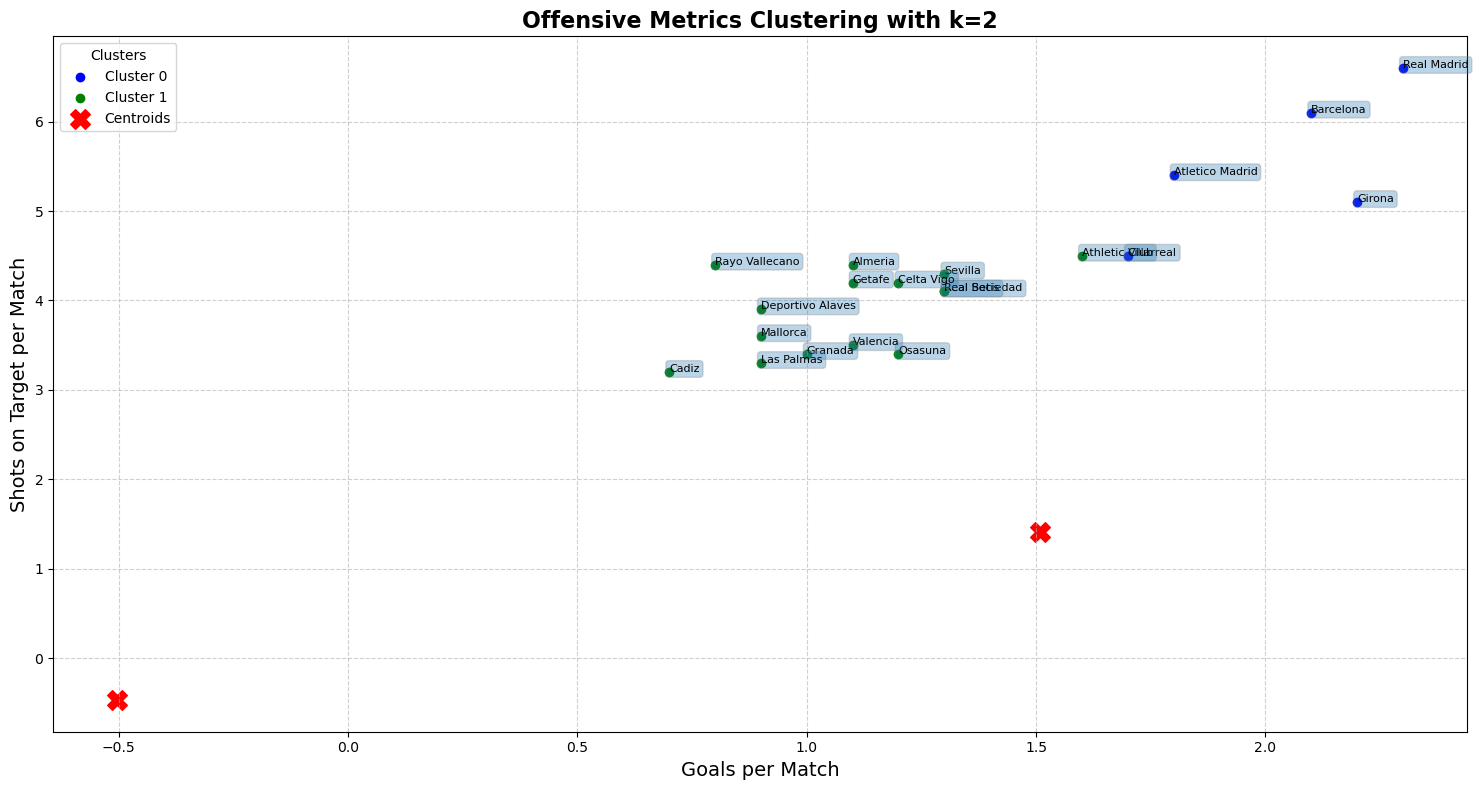

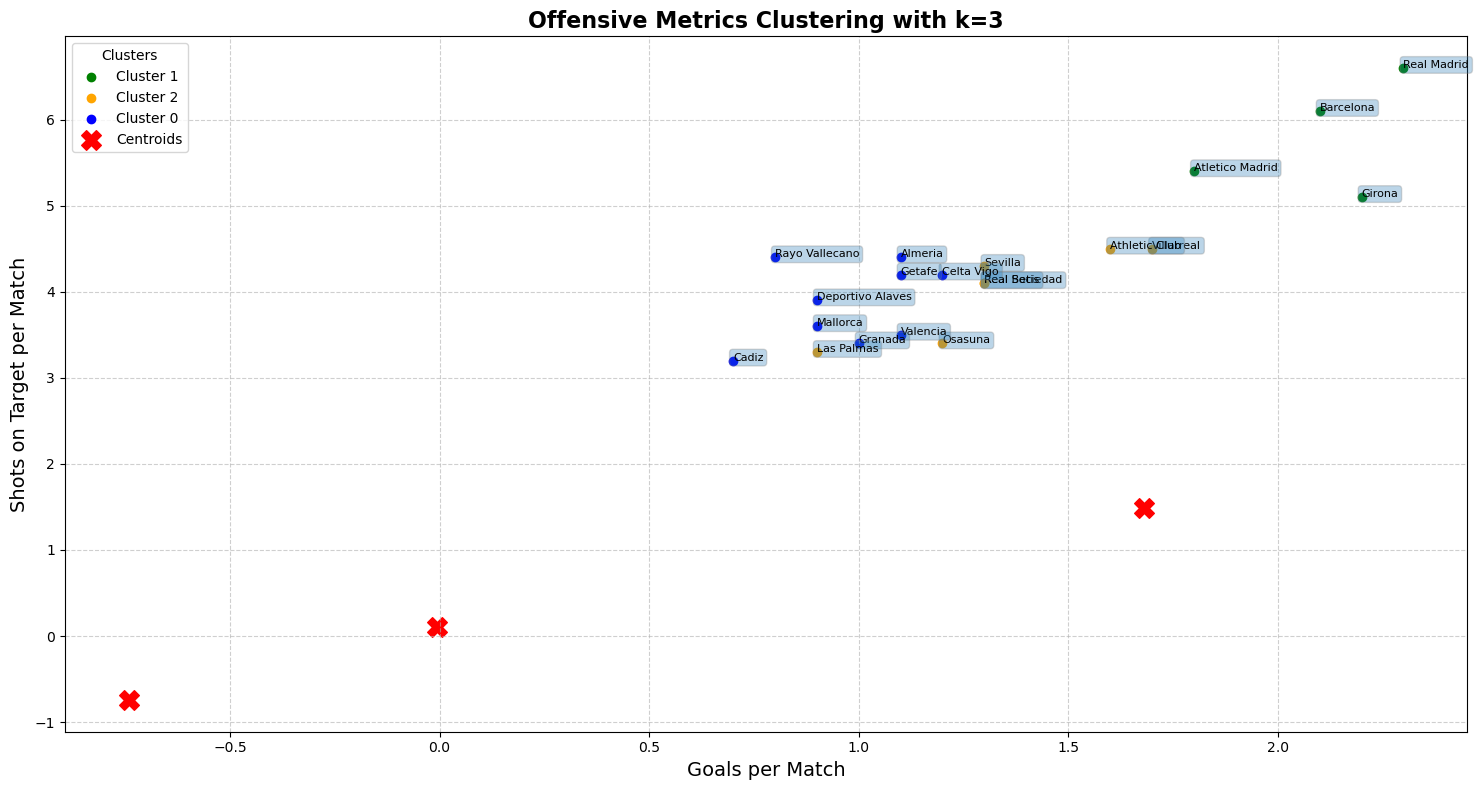

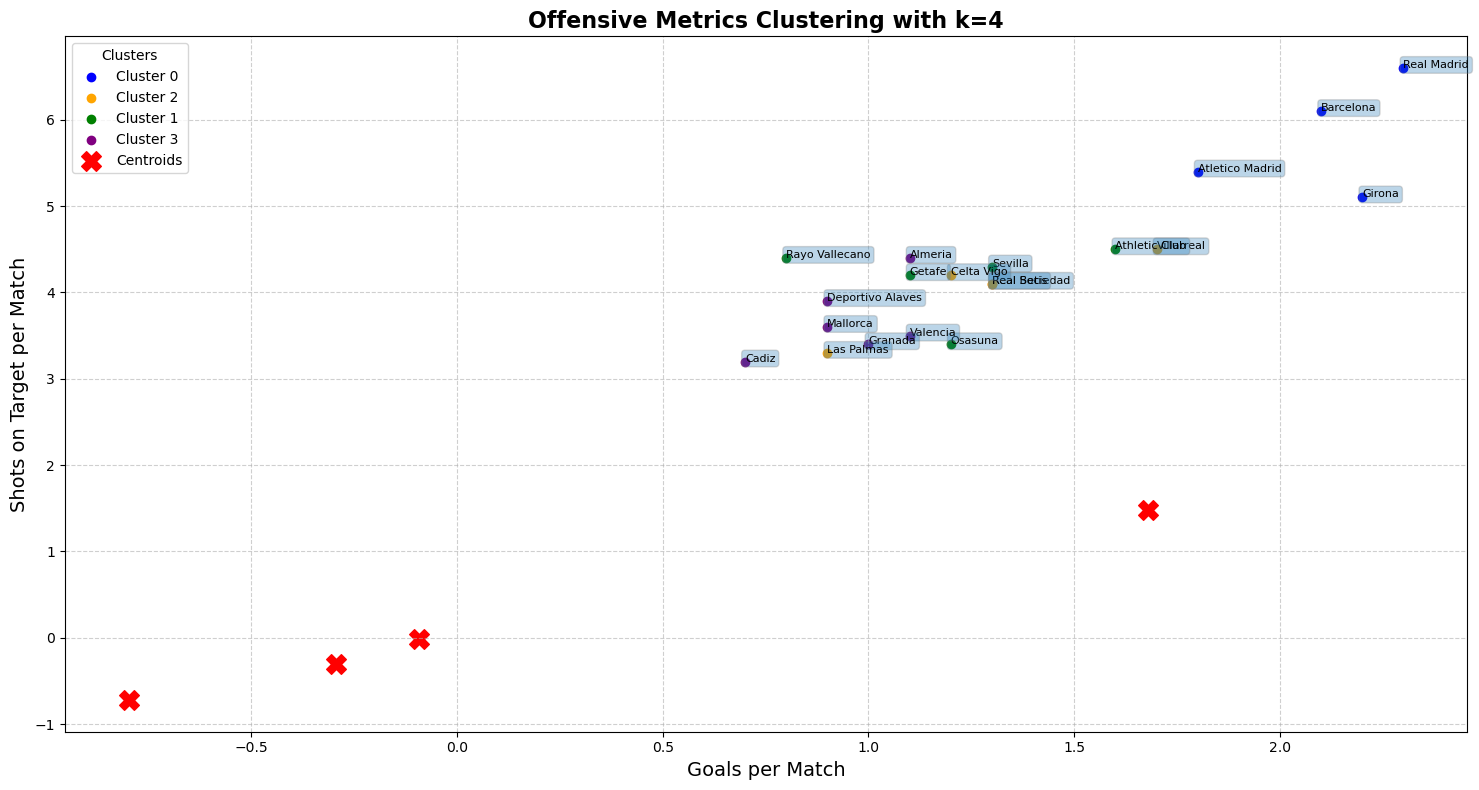

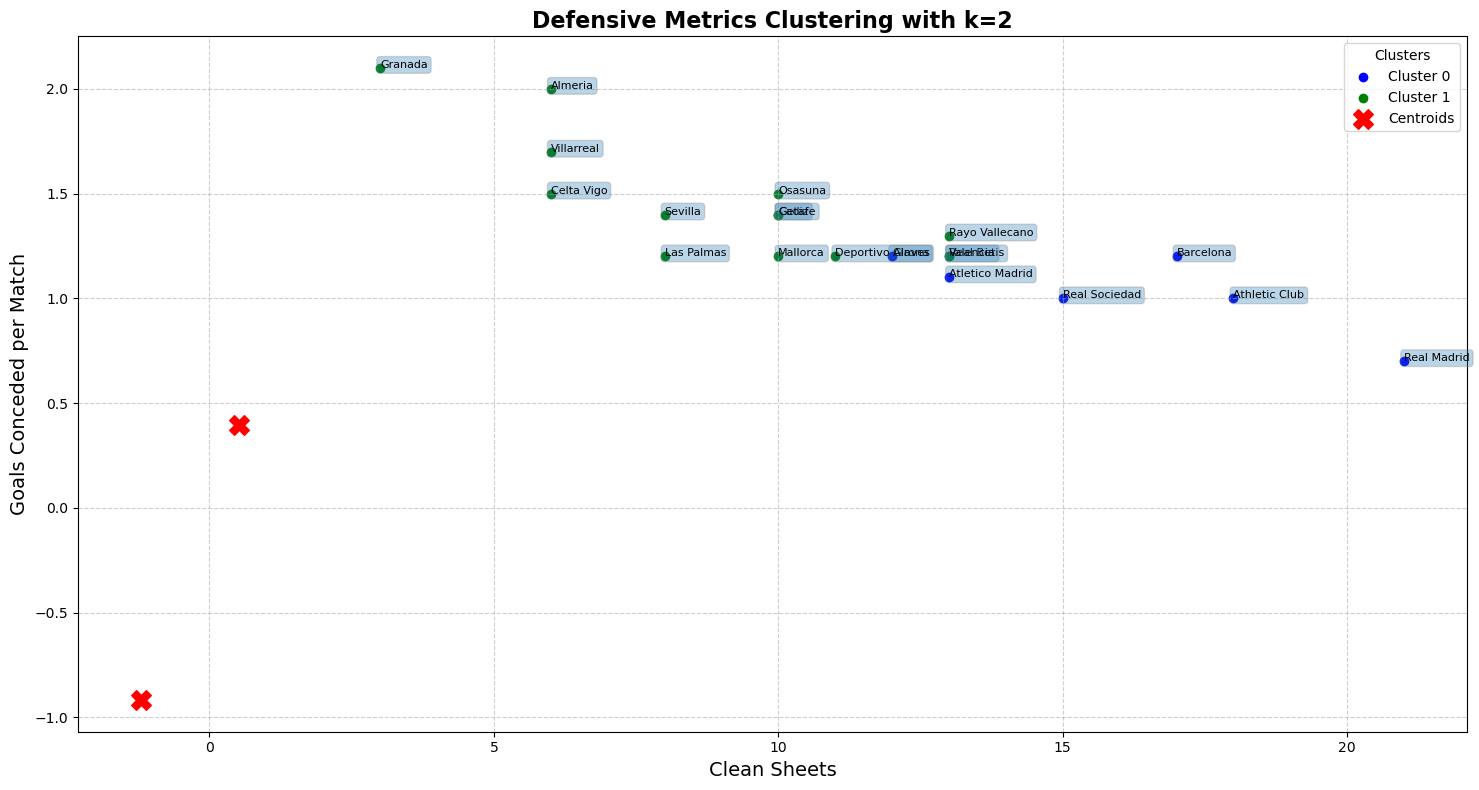

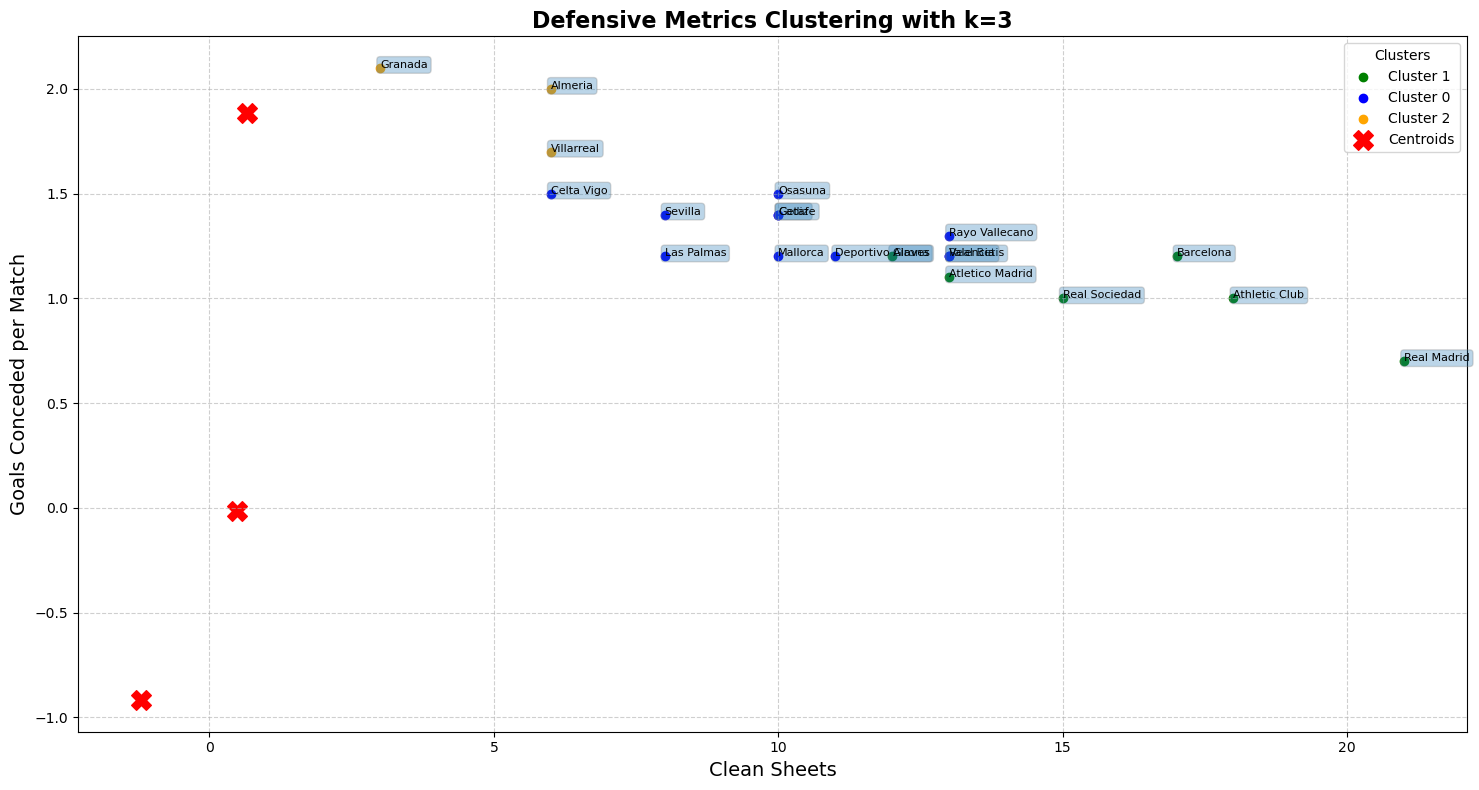

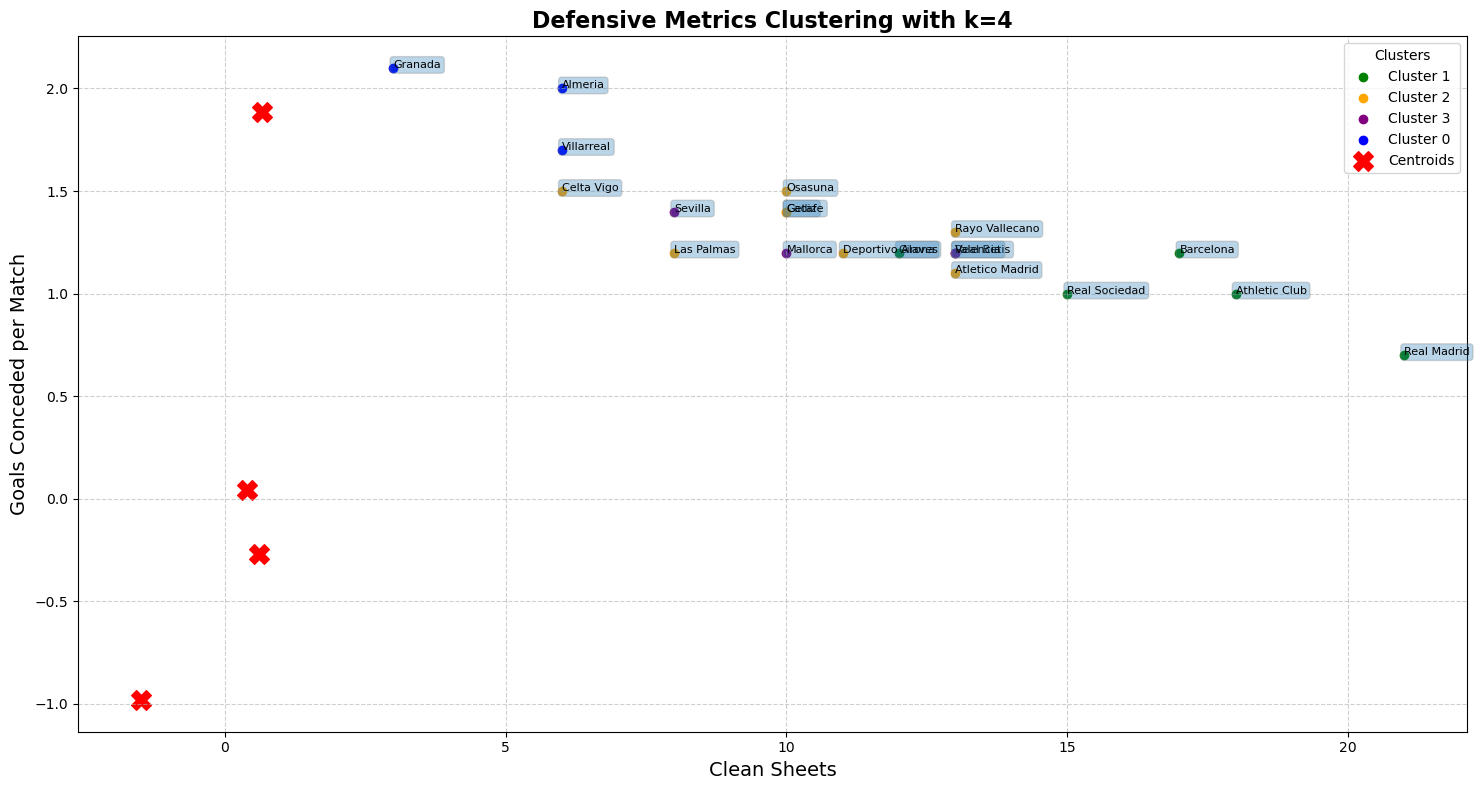

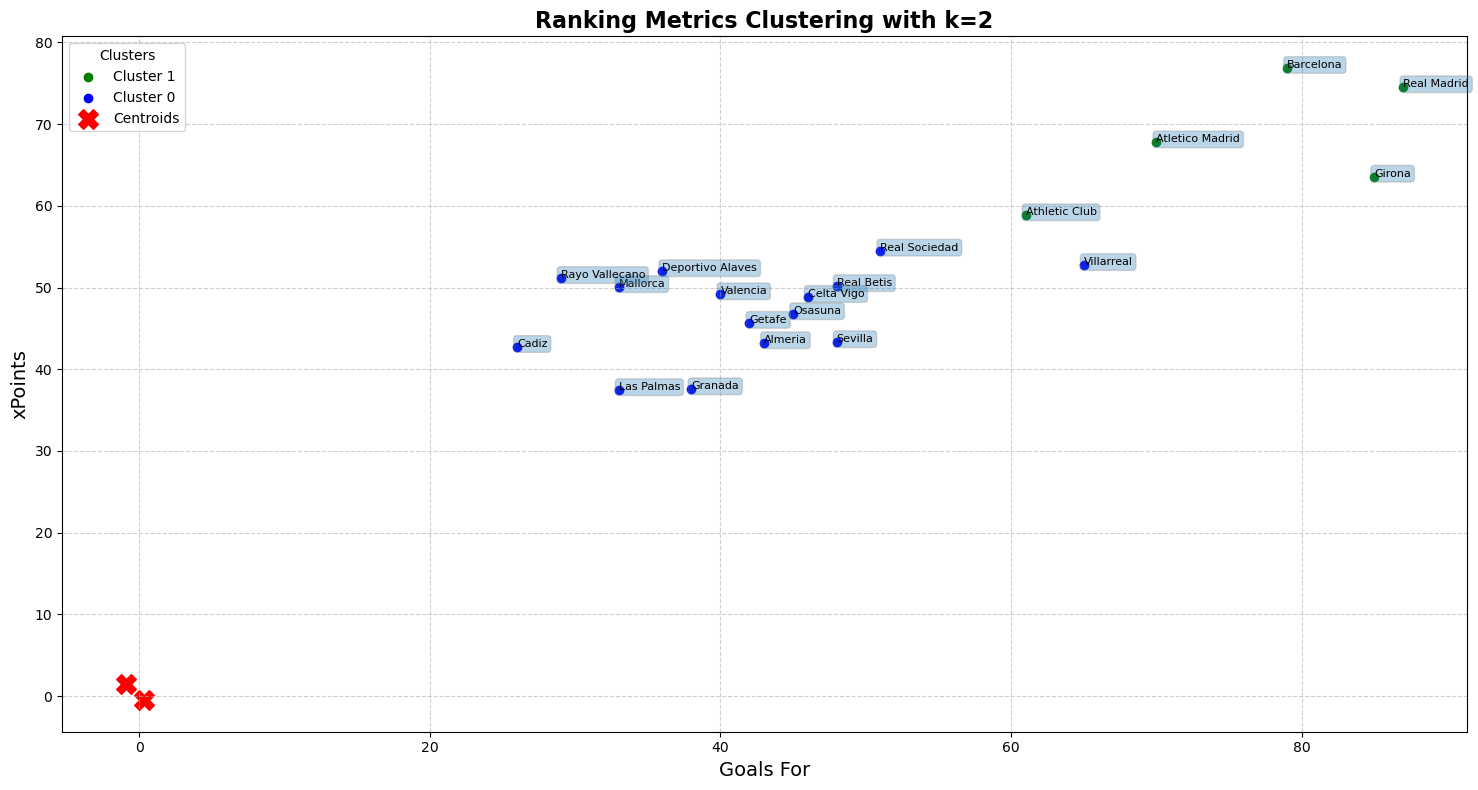

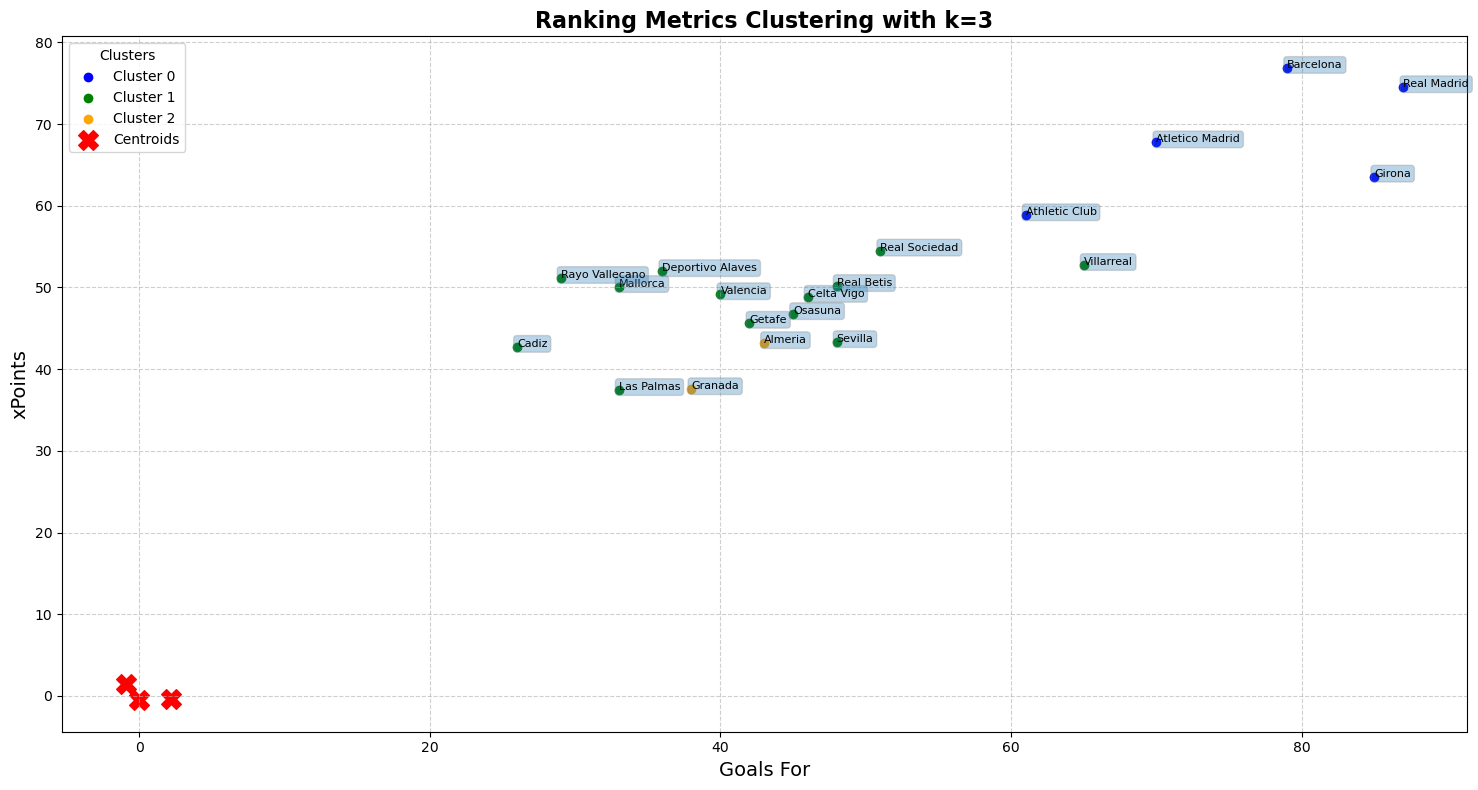

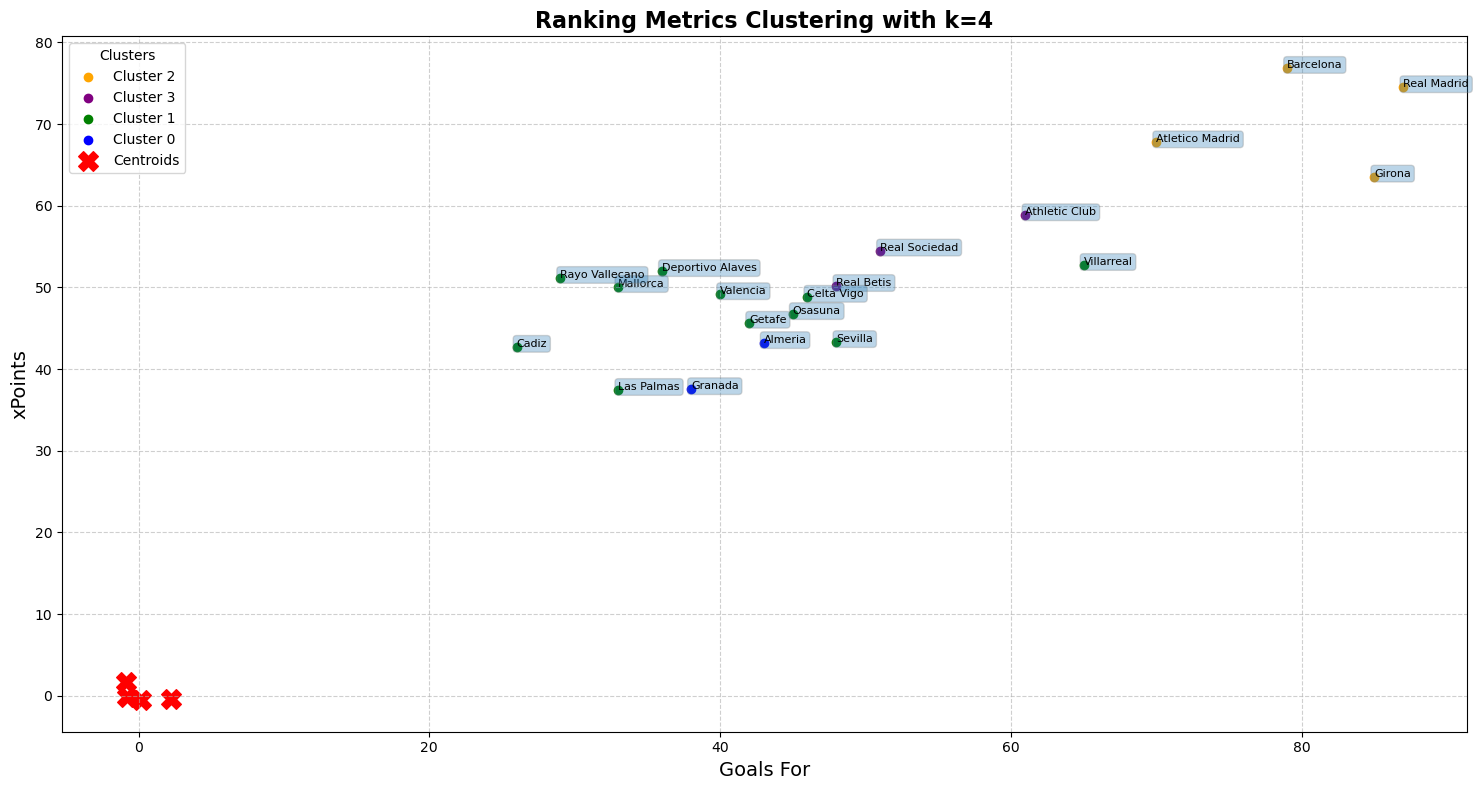

In [90]:
# Enhanced Function to Plot Multiple Clusters
def kmeans_clustering_multiple_k(data_scaled, original_df, k_values, title, x_col, y_col):
    for k in k_values:
        # Fit the K-Means model
        kmeans = KMeans(n_clusters=k, random_state=1)
        clusters = kmeans.fit_predict(data_scaled)

        # Create a copy of the original DataFrame
        clustered_df = original_df.copy()
        
        # Add the predicted clusters to the DataFrame
        clustered_df['Cluster'] = clusters

        # Scatter plot of the clusters
        plt.figure(figsize=(15, 8))
        cluster_colors = ['blue', 'green', 'orange', 'purple', 'pink', 'yellow', 'cyan']
        for cluster in clustered_df['Cluster'].unique():
            cluster_data = clustered_df[clustered_df['Cluster'] == cluster]
            plt.scatter(
                cluster_data[x_col], 
                cluster_data[y_col], 
                label=f'Cluster {cluster}', 
                color=cluster_colors[cluster % len(cluster_colors)]
            )
        
        # Annotate each point with the team name
        for i in range(clustered_df.shape[0]):
            plt.text(
                clustered_df[x_col].iloc[i], 
                clustered_df[y_col].iloc[i], 
                clustered_df['Team'].iloc[i],
                fontsize=8,
                color='black',
                bbox=dict(boxstyle="round,pad=0.3", edgecolor='gray', alpha=0.3)
            )
        
        # Add cluster centroids to the plot
        centroids = kmeans.cluster_centers_
        plt.scatter(
            centroids[:, original_df.columns.get_loc(x_col)], 
            centroids[:, original_df.columns.get_loc(y_col)], 
            color='red', marker='X', s=200, label='Centroids'
        )

        plt.title(f"{title} with k={k}", fontsize=16, weight='bold')
        plt.xlabel(x_col, fontsize=14)
        plt.ylabel(y_col, fontsize=14)
        plt.legend(title='Clusters', fontsize=10)
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.tight_layout()
        plt.show()

# Offensive Metrics Clustering with Multiple k Values
kmeans_clustering_multiple_k(
    data_scaled=offensive_scaled,
    original_df=offensive_df_streamlined,
    k_values=[2, 3, 4],  # Experiment with 2, 3, and 4 clusters
    title="Offensive Metrics Clustering",
    x_col="Goals per Match",
    y_col="Shots on Target per Match"
)

# Defensive Metrics Clustering with Multiple k Values
kmeans_clustering_multiple_k(
    data_scaled=defensive_scaled,
    original_df=defensive_df_streamlined,
    k_values=[2, 3, 4],  # Experiment with 2, 3, and 4 clusters
    title="Defensive Metrics Clustering",
    x_col="Clean Sheets",
    y_col="Goals Conceded per Match"
)

# Ranking Metrics Clustering with Multiple k Values
kmeans_clustering_multiple_k(
    data_scaled=ranking_scaled,
    original_df=ranking_df_streamlined,
    k_values=[2, 3, 4],  # Experiment with 2, 3, and 4 clusters
    title="Ranking Metrics Clustering",
    x_col="Goals For",
    y_col="xPoints"
)


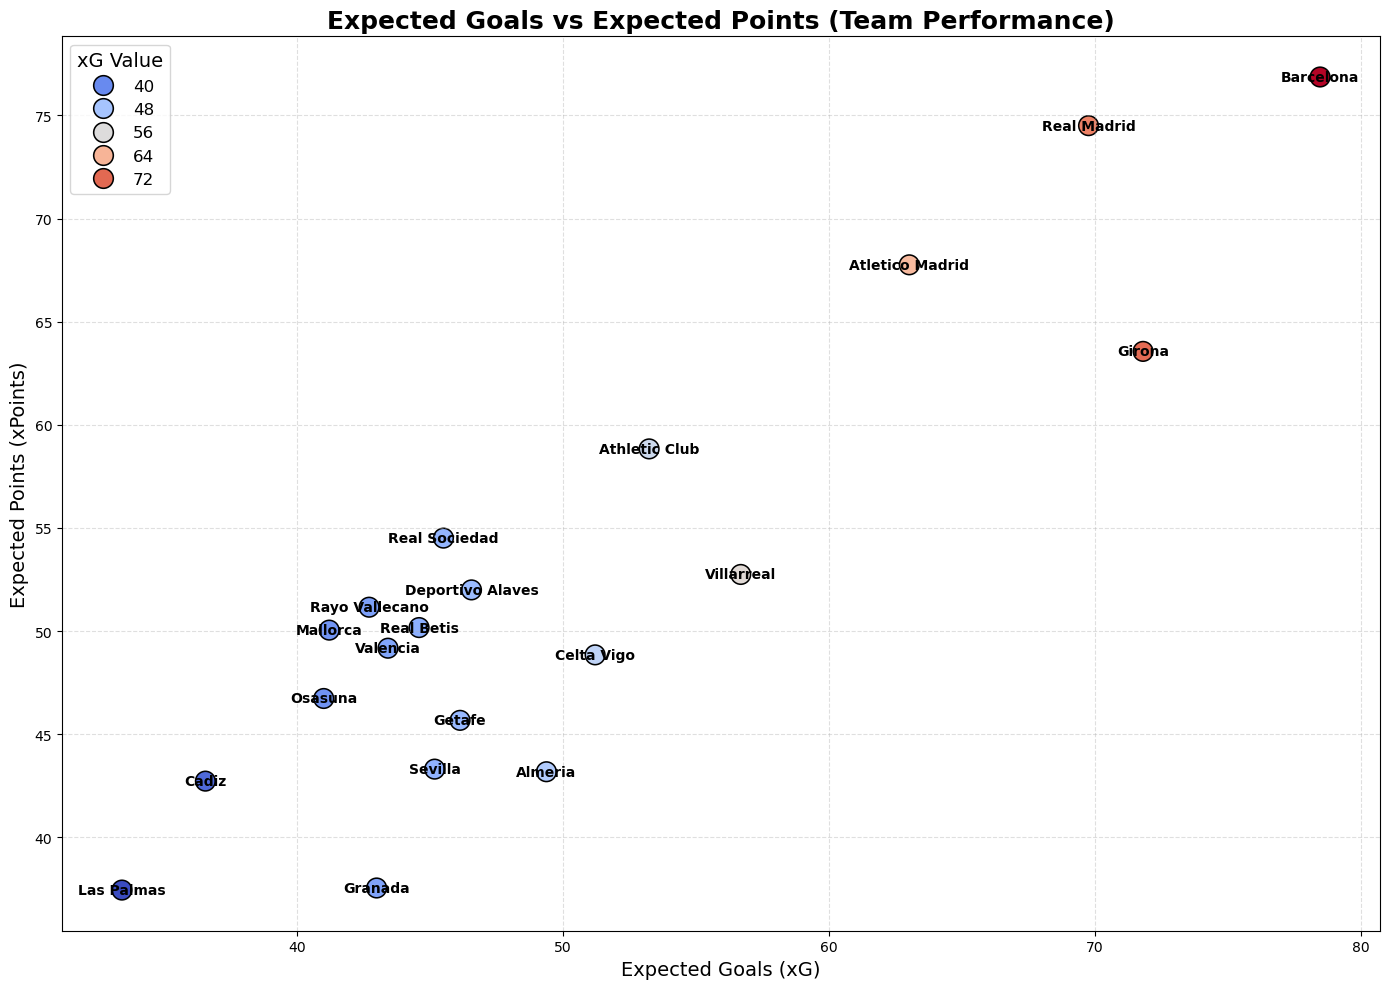

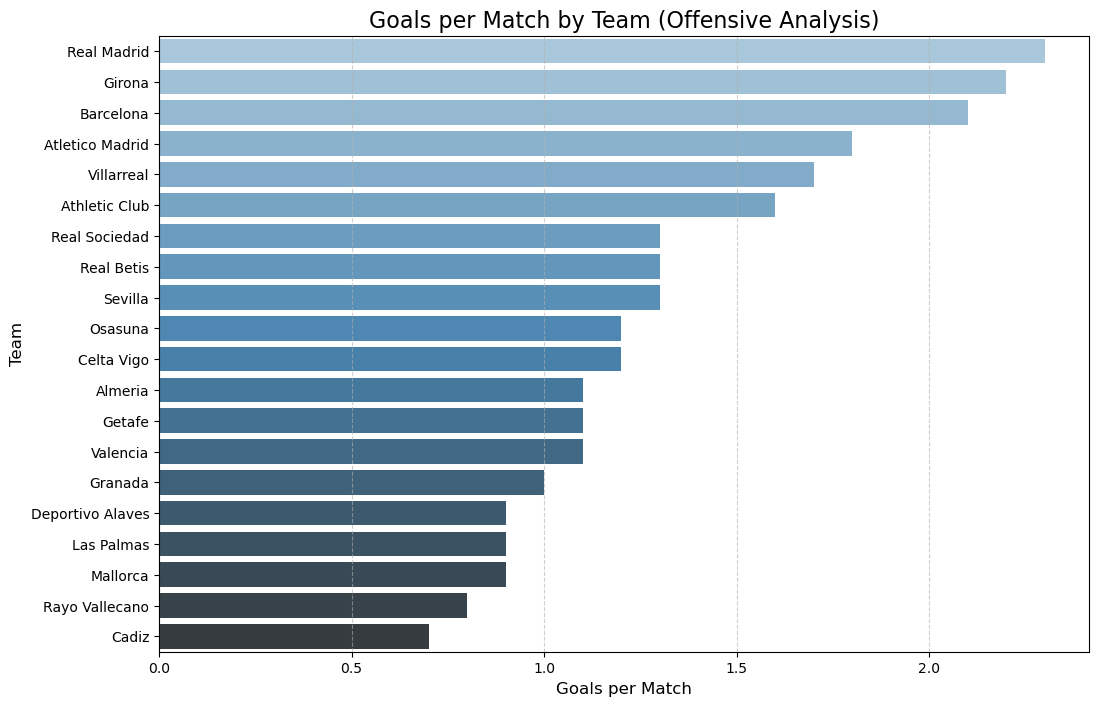

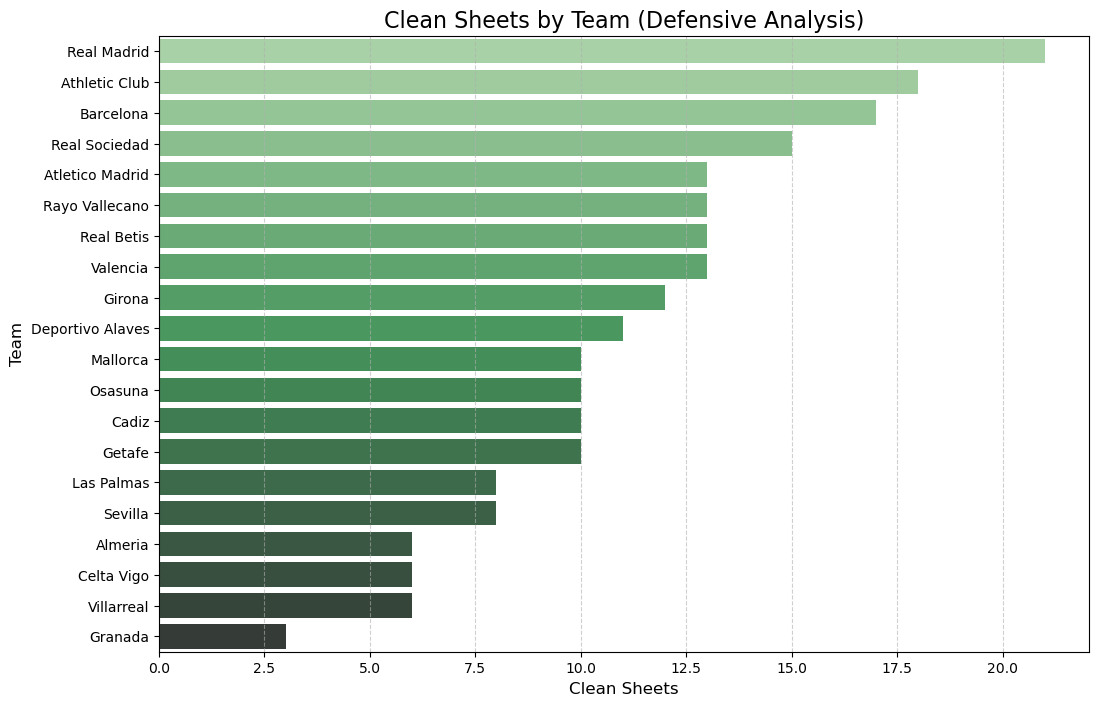

In [91]:
# Visualize Team Stats Metrics: Expected Goals vs Expected Points
plt.figure(figsize=(14, 10))

# Create the scatterplot with a more appealing palette
scatter = sns.scatterplot(
    x='xg',
    y='xPoints',
    data=ranking_df,
    s=200,
    hue='xg',
    palette='coolwarm',  # Gradient color scheme for visual interest
    edgecolor='black'
)

# Customize the title and axis labels
plt.title("Expected Goals vs Expected Points (Team Performance)", fontsize=18, fontweight='bold')
plt.xlabel("Expected Goals (xG)", fontsize=14)
plt.ylabel("Expected Points (xPoints)", fontsize=14)

# Annotate each point with the team name
for i in range(ranking_df.shape[0]):
    plt.text(
        x=ranking_df['xg'].iloc[i], 
        y=ranking_df['xPoints'].iloc[i], 
        s=ranking_df['Team'].iloc[i],
        fontsize=10,
        color='black',
        weight='bold',
        ha='center', 
        va='center'
    )

# Add a legend for the hue
scatter.legend(title="xG Value", loc='upper left', fontsize=12, title_fontsize=14)

# Improve the grid and layout
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()

plt.show()


# Visualize Offensive Metrics: Goals per Match
plt.figure(figsize=(12, 8))
offensive_sorted = offensive_df.sort_values(by='Goals per Match', ascending=False)
sns.barplot(x='Goals per Match', y='Team', data=offensive_sorted, palette='Blues_d')
plt.title("Goals per Match by Team (Offensive Analysis)", fontsize=16)
plt.xlabel("Goals per Match", fontsize=12)
plt.ylabel("Team", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

# Visualize Defensive Metrics: Clean Sheets
plt.figure(figsize=(12, 8))
defensive_sorted = defensive_df.sort_values(by='Clean Sheets', ascending=False)
sns.barplot(x='Clean Sheets', y='Team', data=defensive_sorted, palette='Greens_d')
plt.title("Clean Sheets by Team (Defensive Analysis)", fontsize=16)
plt.xlabel("Clean Sheets", fontsize=12)
plt.ylabel("Team", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()



In [92]:
offensive_df.head()

Team  Goals per Match  Total Goals Scored  \
Rank                                                         
1         Real Madrid              2.3                  87   
2              Girona              2.2                  85   
3           Barcelona              2.1                  79   
4     Atletico Madrid              1.8                  70   
5          Villarreal              1.7                  65   

      Rank_ontarget_scoring_att_team  Shots on Target per Match  \
Rank                                                              
1                                  1                        6.6   
2                                  4                        5.1   
3                                  2                        6.1   
4                                  3                        5.4   
5                                  5                        4.5   

      Shot Conversion Rate (%)  Rank_accurate_pass_team  \
Rank                                                      
1                         14.6                        1   
2                         17.6                        4   
3                         13.3                        2   
4                         14.6                        5   
5                         13.9                        7   

      Accurate Passes per Match  Pass Success (%)  Rank_accurate_cross_team  \
Rank                                                                          
1                           549              90.1                        16   
2                           469              87.9                         7   
3                           539              88.6                         8   
4                           425              84.6                        18   
5                           378              84.2                        10   

      ...  Rank_big_chance_team  Big Chances  Goals  \
Rank  ...                                             
1     ...                     3          123     87   
2     ...                     1          131     85   
3     ...                     2          127     79   
4     ...                     4          121     70   
5     ...                     6           92     65   

      Rank_touches_in_opp_box_team  Touches in Opposition Box  \
Rank                                                            
1                                1                       1259   
2                                3                       1048   
3                                2                       1177   
4                                4                       1012   
5                                7                        910   

      Rank_possession_percentage_team  Possession (%)  \
Rank                                                    
1                                   3            59.4   
2                                   4            57.2   
3                                   1            64.7   
4                                   6            50.7   
5                                  10            49.6   

      Rank_possession_won_att_3rd_team  Possession Won Final 3rd per Match  \
Rank                                                                         
1                                    2                                   4   
2                                   17                                   3   
3                                    5                                   4   
4                                    6                                   4   
5                                   12                                   4   

      Total Possessions Won  
Rank                         
1                       781  
2                       746  
3                       811  
4                       801  
5                       711  

[5 rows x 25 columns]

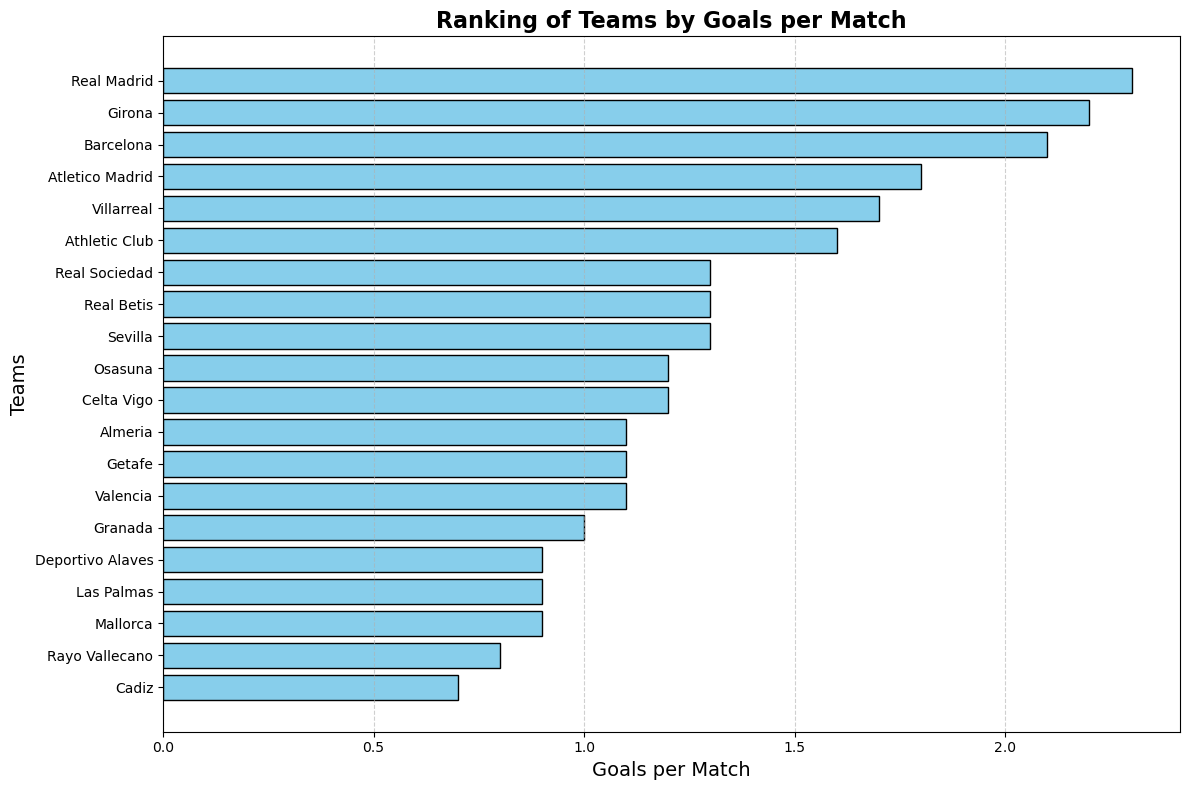

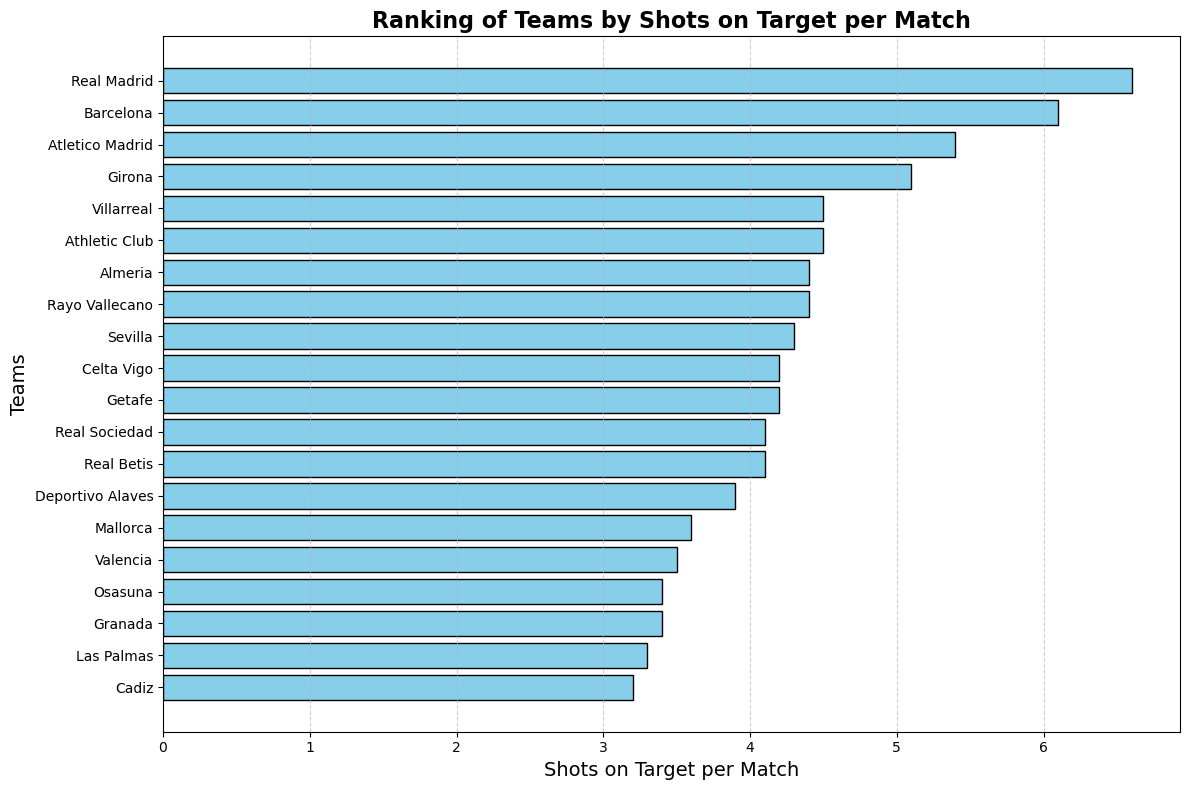

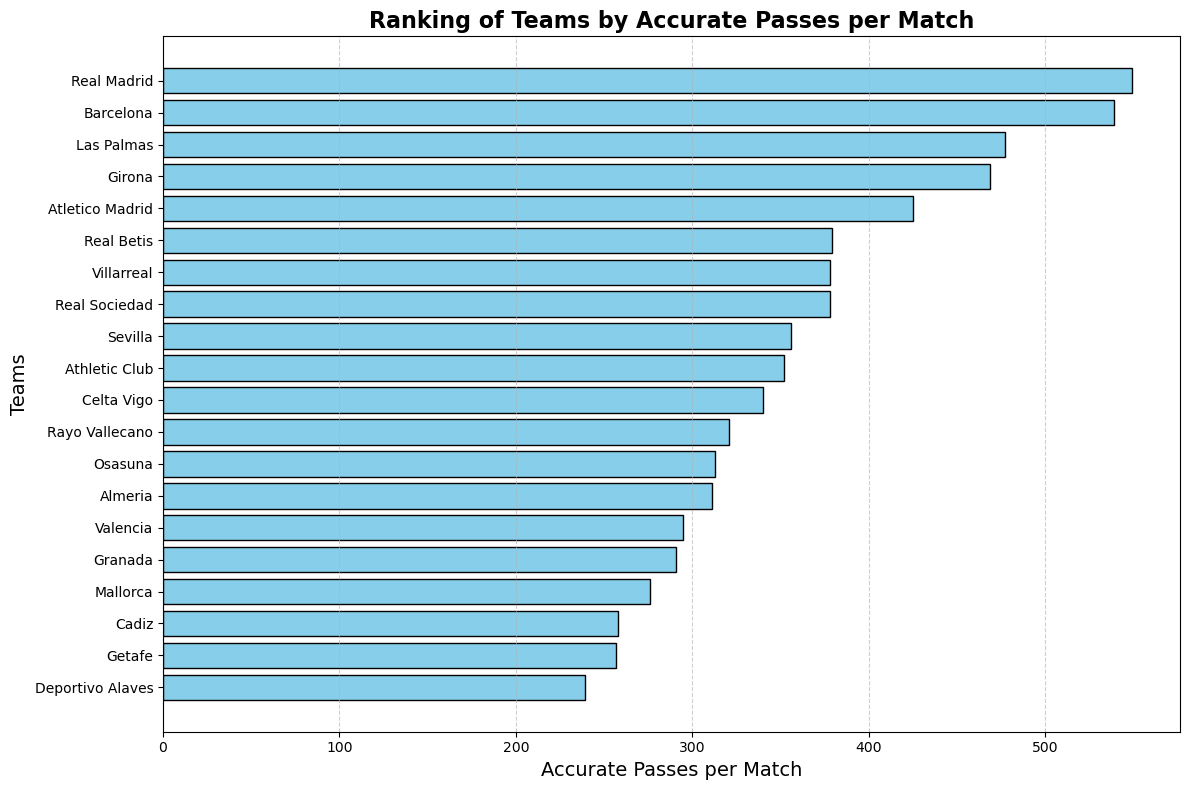

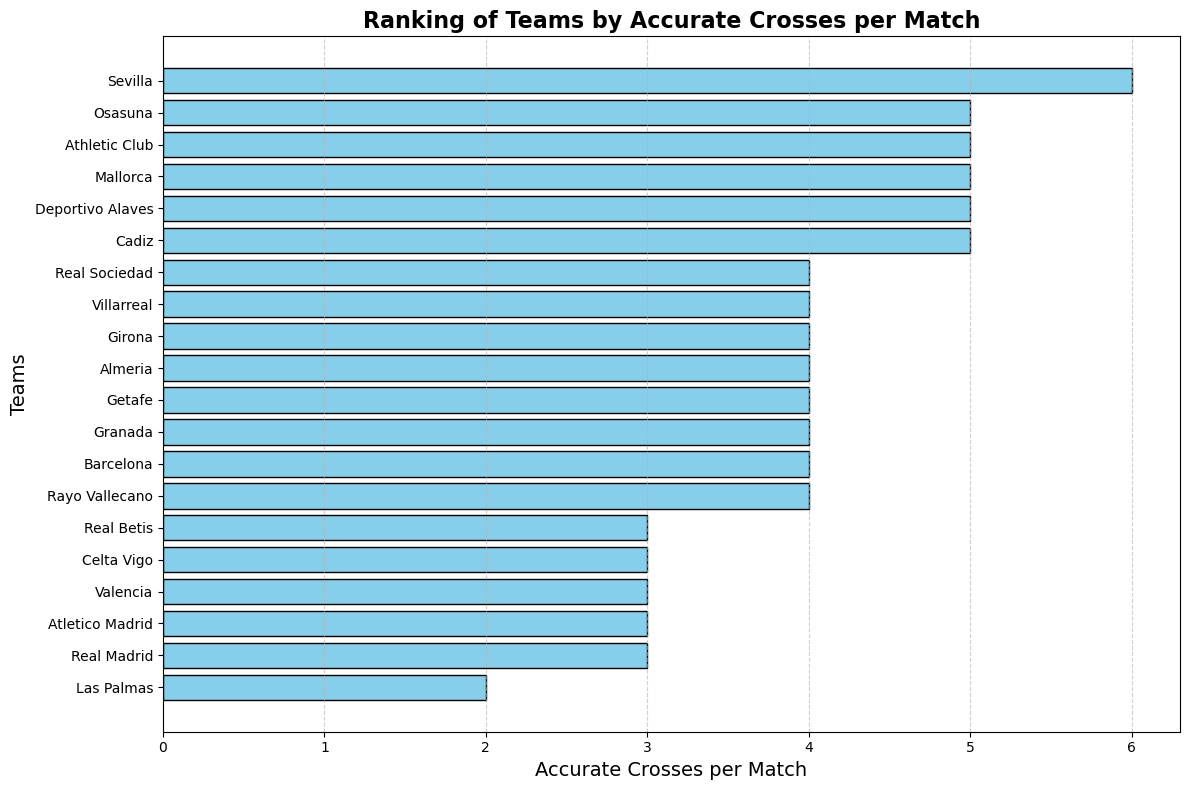

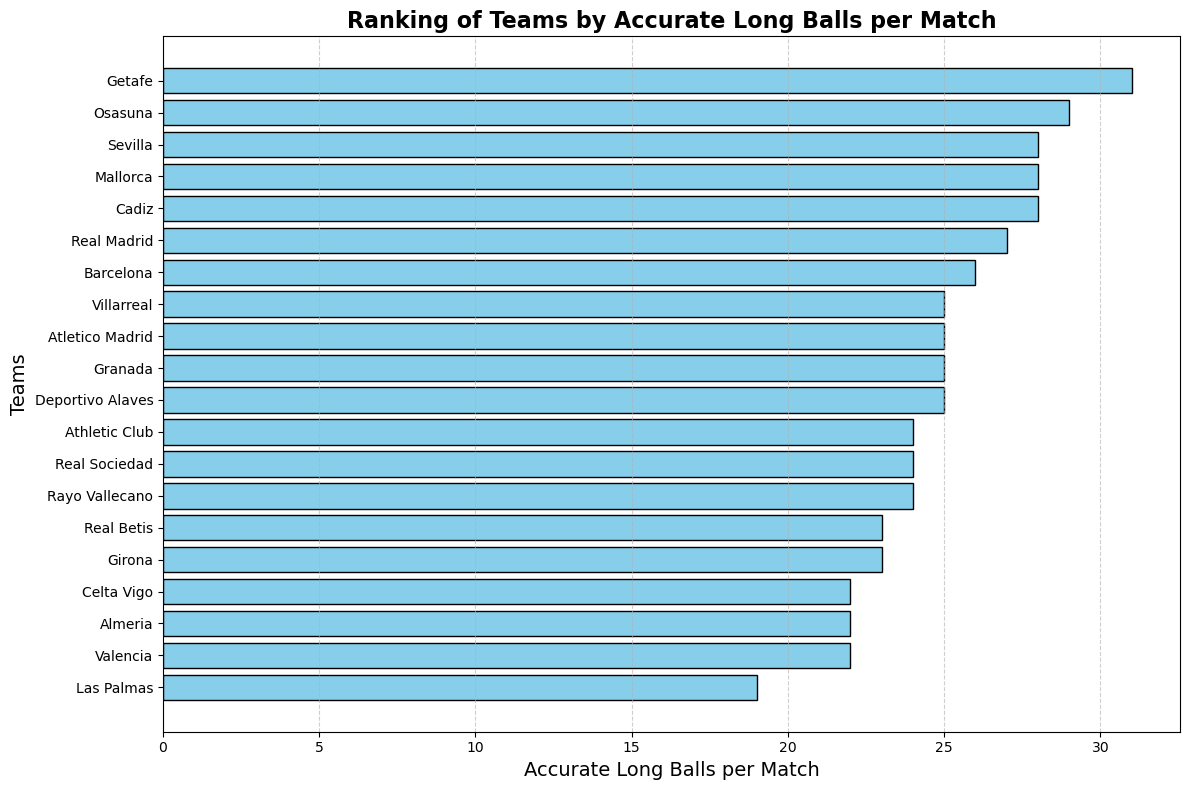

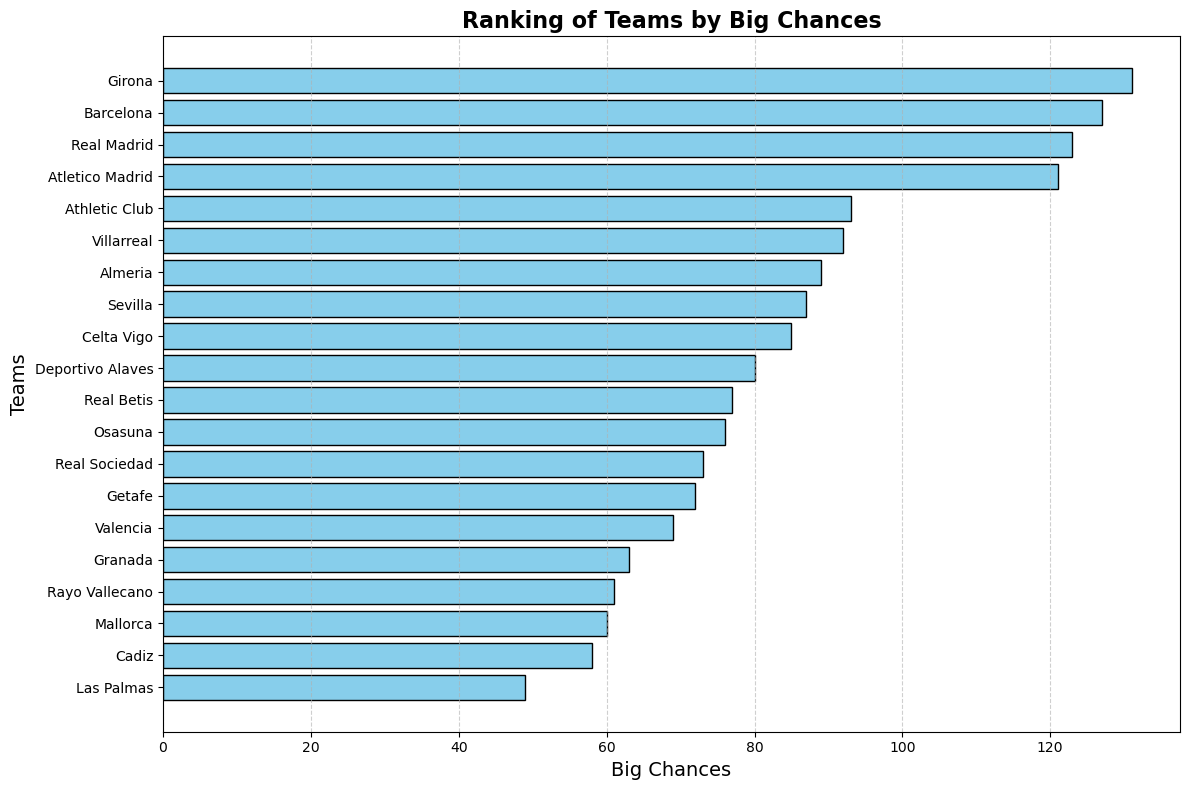

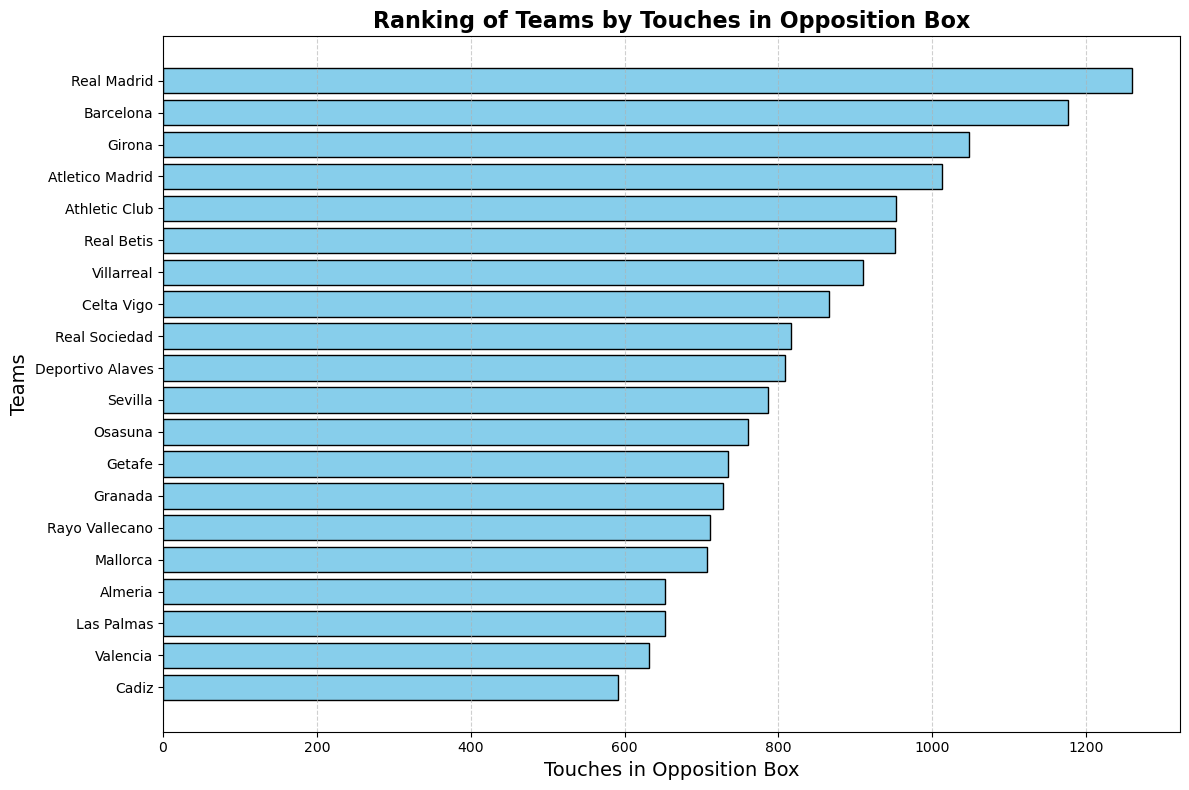

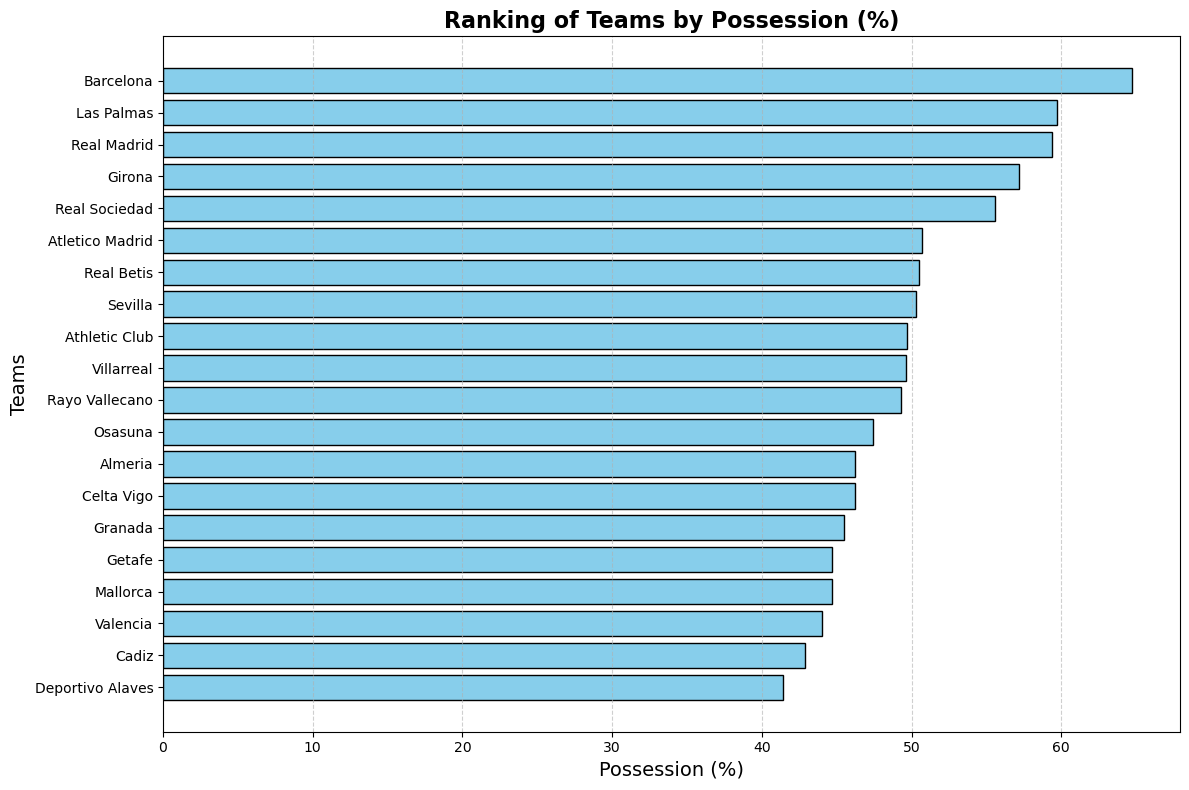

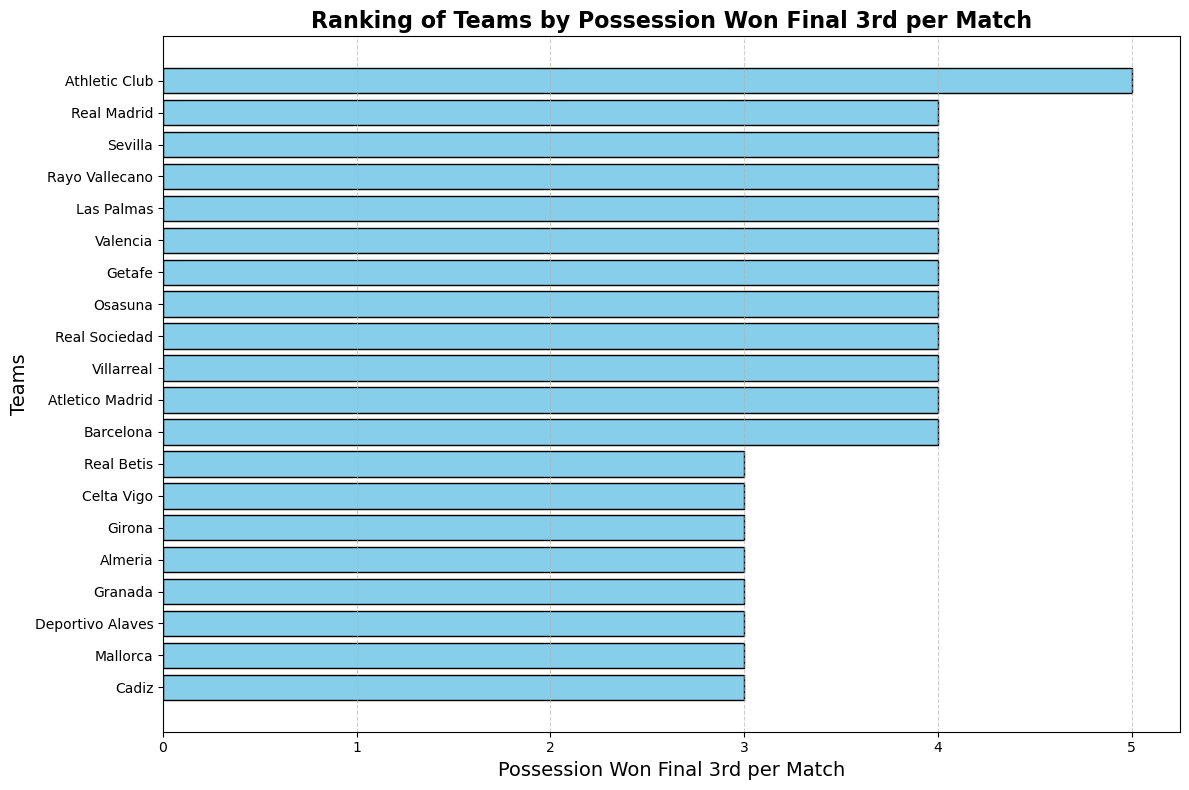

In [93]:
# List of offensive metrics to visualize
offensive_metrics = [
    'Goals per Match',
    'Shots on Target per Match',
    'Accurate Passes per Match',
    'Accurate Crosses per Match',
    'Accurate Long Balls per Match',
    'Big Chances',
    'Touches in Opposition Box',
    'Possession (%)',
    'Possession Won Final 3rd per Match'
]

# Plot rankings for each offensive metric
for metric in offensive_metrics:
    plt.figure(figsize=(12, 8))
    sorted_df = offensive_df.sort_values(metric, ascending=False)
    plt.barh(sorted_df['Team'], sorted_df[metric], color='skyblue', edgecolor='black')
    plt.title(f"Ranking of Teams by {metric}", fontsize=16, fontweight='bold')
    plt.xlabel(metric, fontsize=14)
    plt.ylabel("Teams", fontsize=14)
    plt.gca().invert_yaxis()  # Invert y-axis for ranking order
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


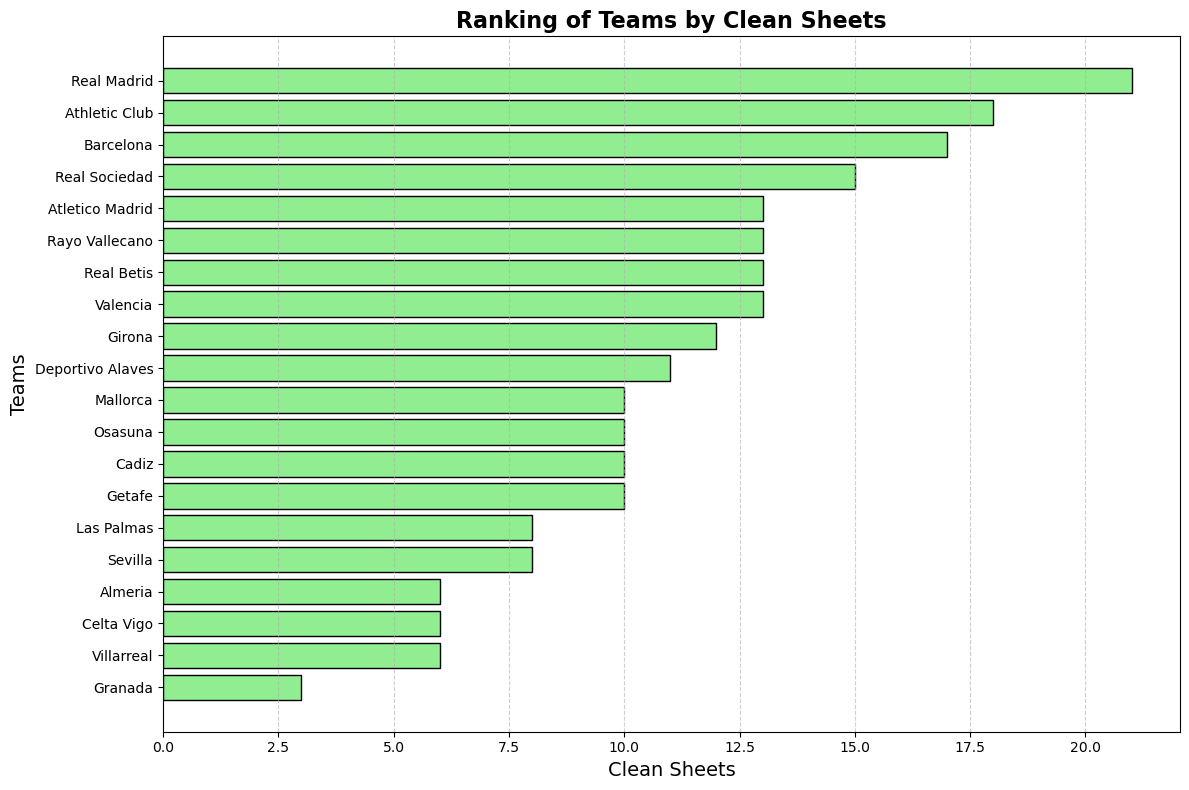

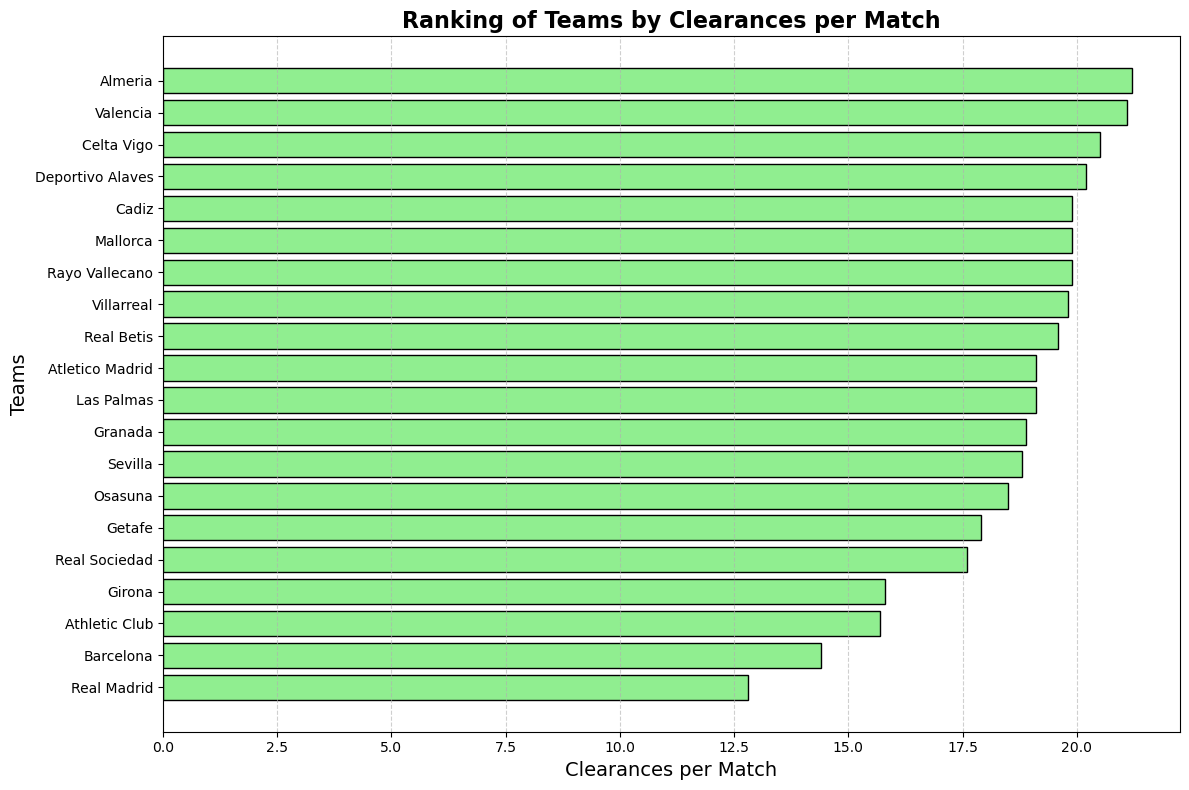

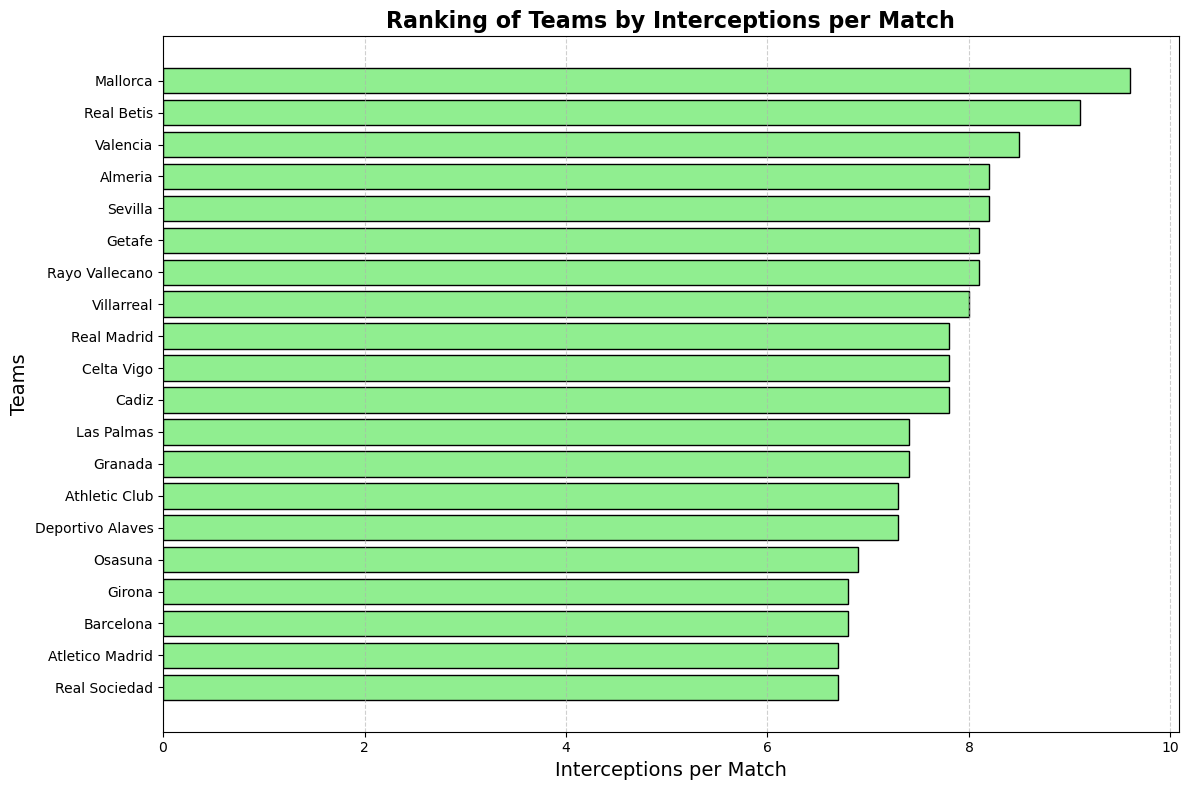

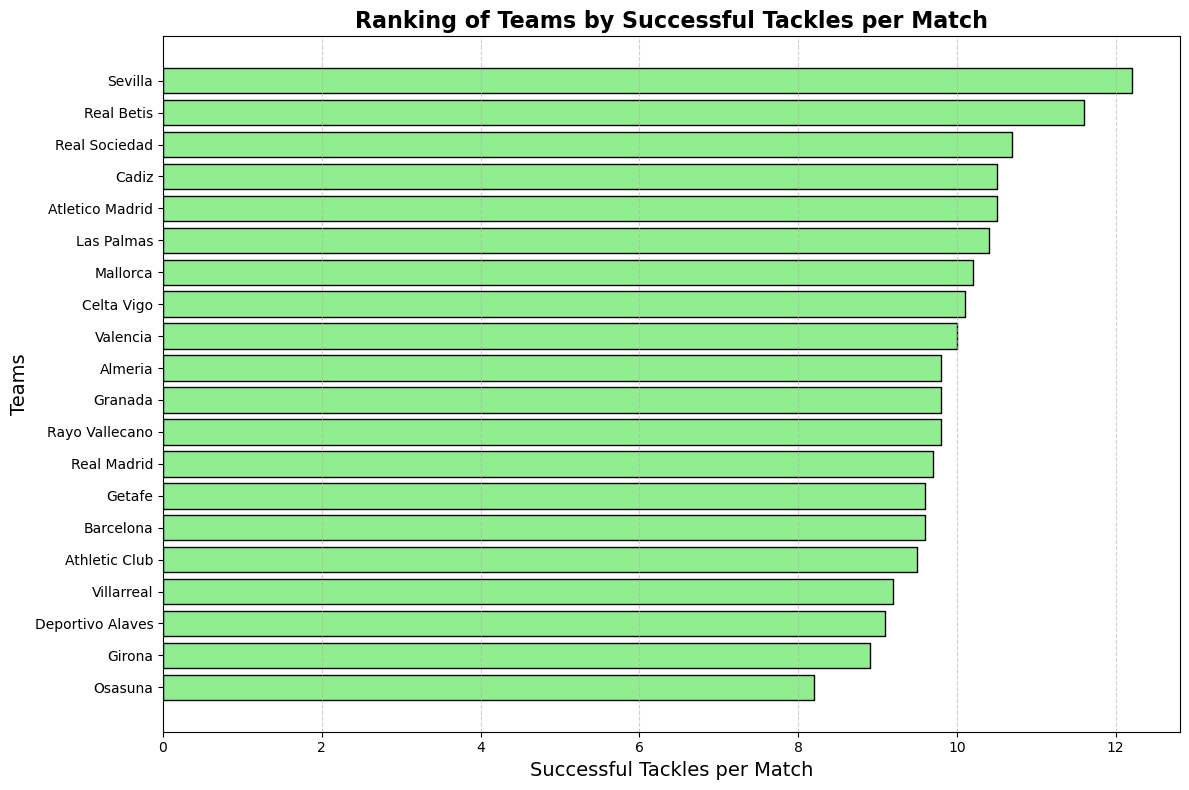

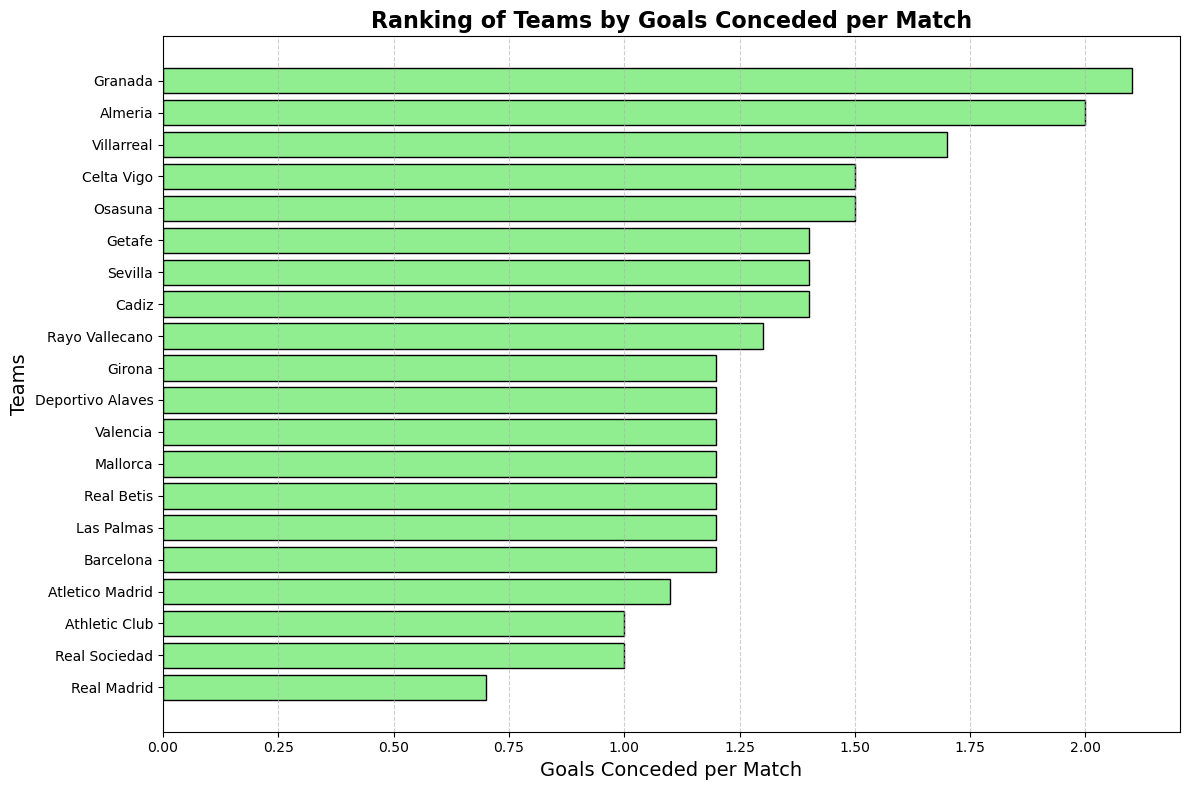

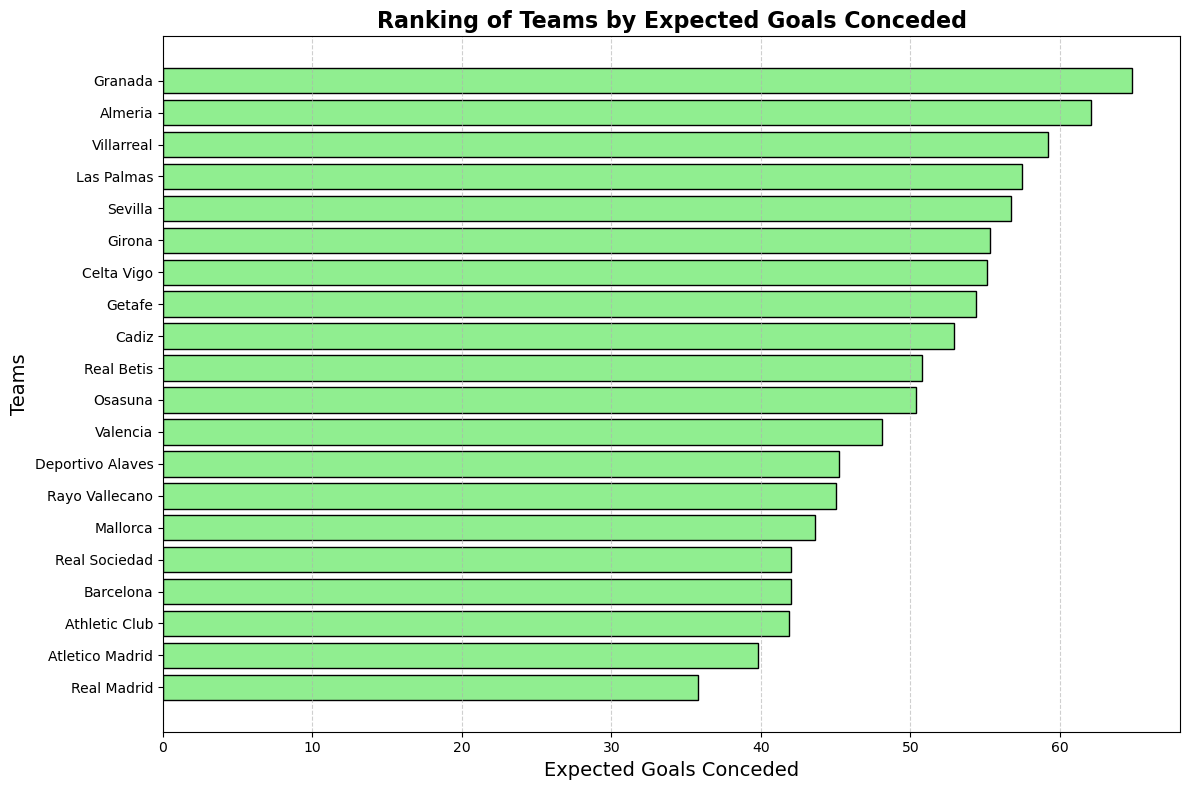

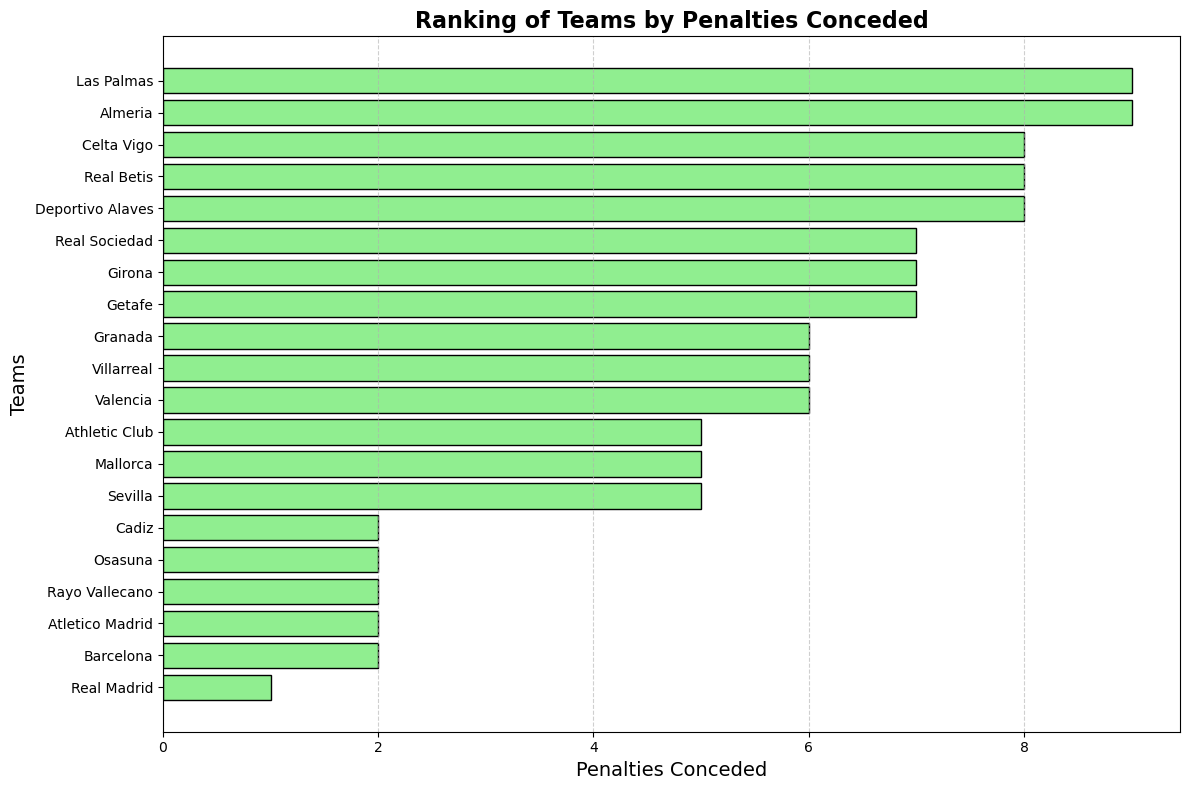

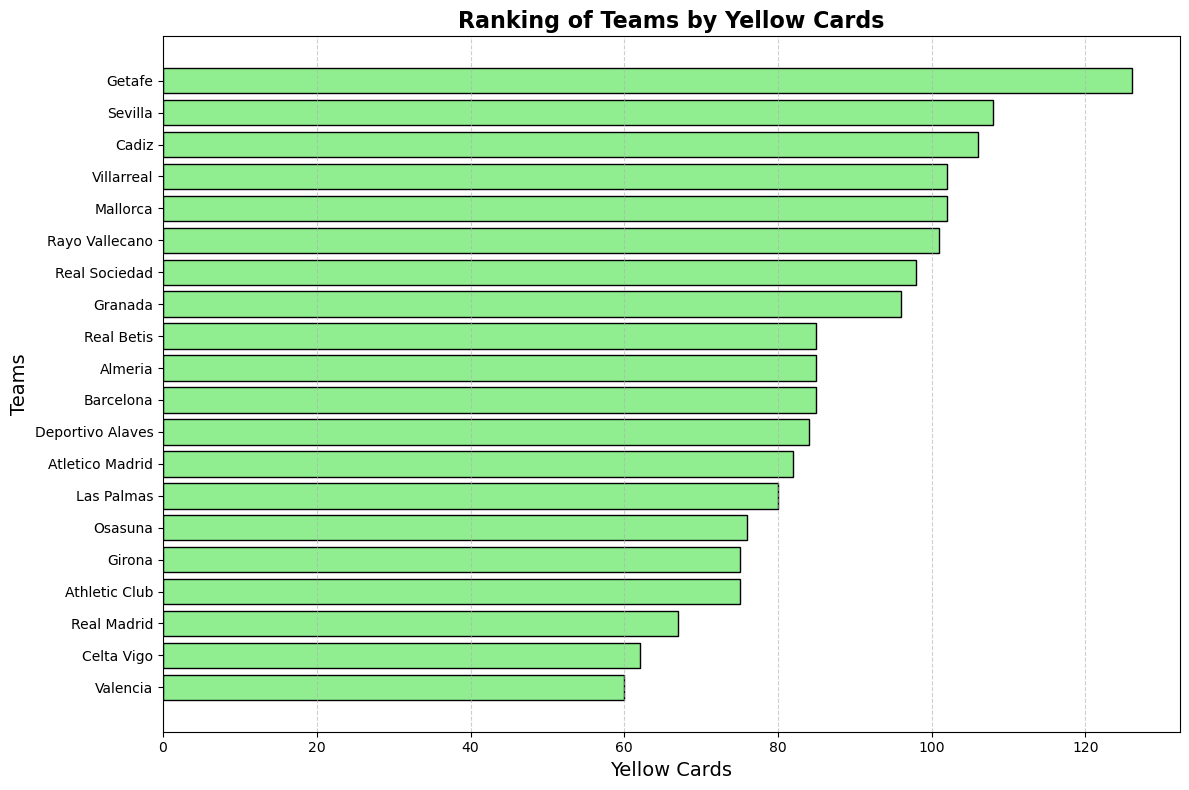

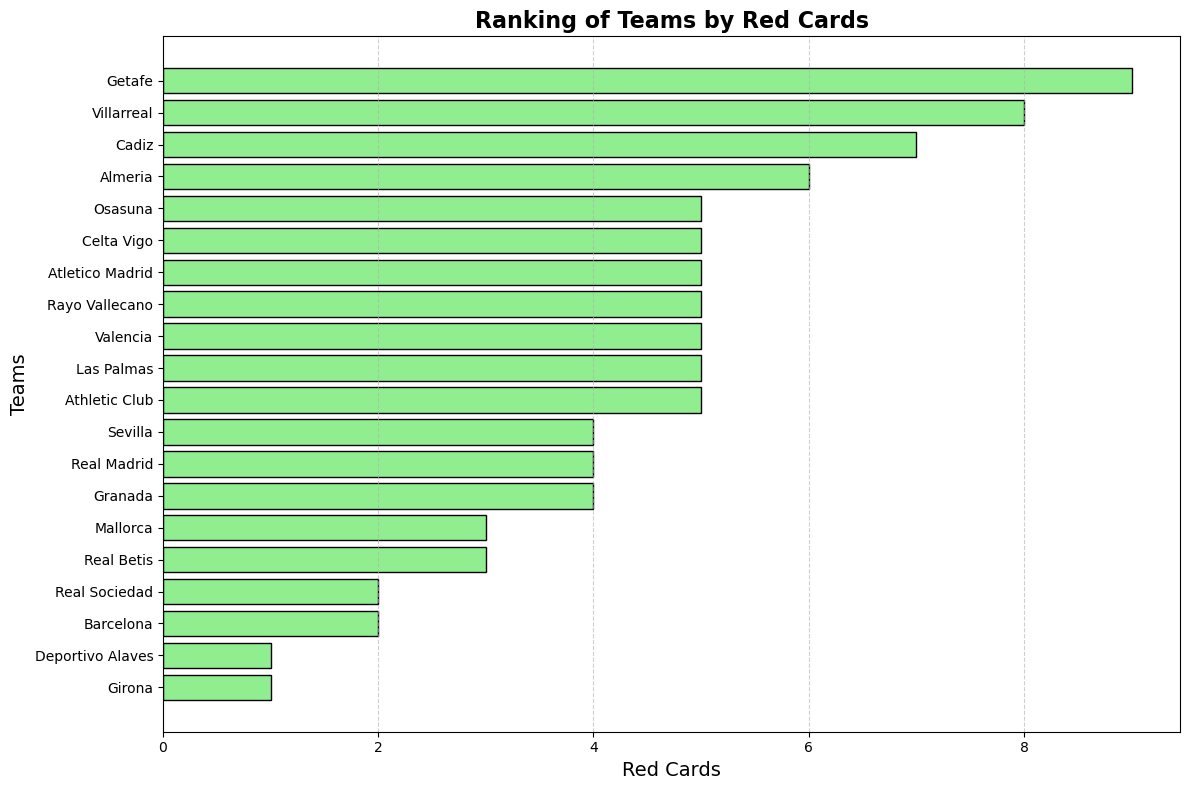

In [94]:
# List of defensive metrics to visualize
defensive_metrics = [
    'Clean Sheets',
    'Clearances per Match',
    'Interceptions per Match',
    'Successful Tackles per Match',
    'Goals Conceded per Match',
    'Expected Goals Conceded',
    'Penalties Conceded',
    'Yellow Cards',
    'Red Cards'
]

# Plot rankings for each defensive metric
for metric in defensive_metrics:
    plt.figure(figsize=(12, 8))
    sorted_df = defensive_df.sort_values(metric, ascending=False)
    plt.barh(sorted_df['Team'], sorted_df[metric], color='lightgreen', edgecolor='black')
    plt.title(f"Ranking of Teams by {metric}", fontsize=16, fontweight='bold')
    plt.xlabel(metric, fontsize=14)
    plt.ylabel("Teams", fontsize=14)
    plt.gca().invert_yaxis()  # Invert y-axis for ranking order
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


# PCA Variance Analysis

The PCA variance analysis reveals the amount of information (variance) captured by each principal component in the offensive, defensive, and ranking metrics data. Below is a detailed breakdown of the results:

---

## Offensive Metrics
- **PC1** explains **62.29%** of the variance, indicating it captures the majority of offensive performance patterns.
- The first two components together explain **76.33%** of the variance, suggesting a strong reduction potential.
- By the 5th component, **96.22%** of the variance is captured.

**Key Insight**:  
Most offensive metrics' variance can be explained using just the first two to three components.

---

## Defensive Metrics
- **PC1** explains **48.97%** of the variance, showing a somewhat distributed variance across components compared to offensive metrics.
- The first three components account for **78.78%**, and the first five account for **92.65%** of the variance.
- **PC7 onwards** contribute minimal variance, making them less significant for analysis.

**Key Insight**:  
While the variance is spread across components, the first three components are sufficient for most defensive analysis.

---

## Ranking Metrics
- **PC1** alone explains **72.73%** of the variance, a significantly dominant component.
- The first two components capture **86.99%** of the variance, indicating a very compact data structure.
- Beyond **PC5**, the contributions are minimal.

**Key Insight**:  
Ranking metrics are highly concentrated, with the first two components being sufficient for meaningful insights.

---

## Recommendations

### Dimensionality Reduction:
- Use the first **2-3 components** for offensive metrics.
- Use the first **3 components** for defensive metrics.
- Use the first **2 components** for ranking metrics.

### Visualizations:
- Scatter plots using **PC1** and **PC2** can be highly representative for all metrics.

### Cluster Analysis:
- Perform clustering on the reduced datasets for more efficient and interpretable results.



Variance Explained for Offensive Metrics:
   Principal Component  Explained Variance Ratio  Cumulative Variance
0                  PC1                  0.622857             0.622857
1                  PC2                  0.140402             0.763259
2                  PC3                  0.105149             0.868408
3                  PC4                  0.050311             0.918719
4                  PC5                  0.043439             0.962158
5                  PC6                  0.027277             0.989435
6                  PC7                  0.005772             0.995207
7                  PC8                  0.003294             0.998501
8                  PC9                  0.001052             0.999552
9                 PC10                  0.000373             0.999926
10                PC11                  0.000074             1.000000


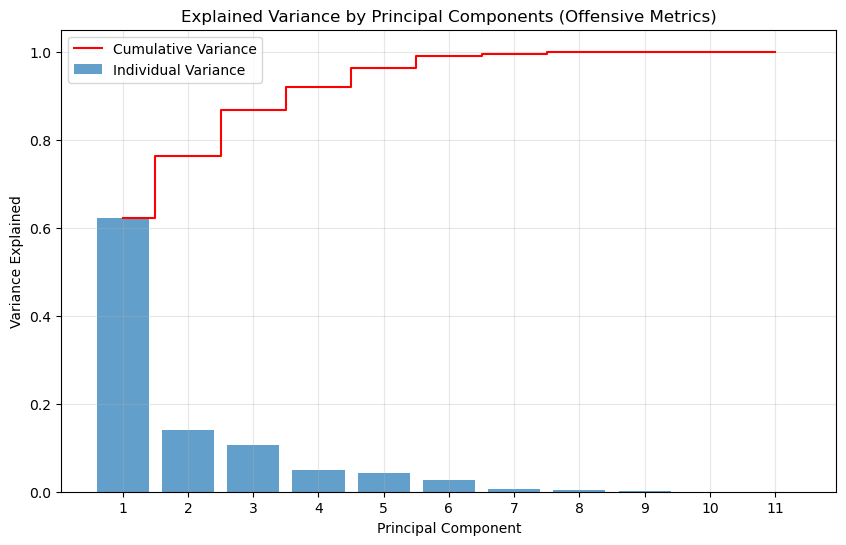


Variance Explained for Defensive Metrics:
   Principal Component  Explained Variance Ratio  Cumulative Variance
0                  PC1              4.897317e-01             0.489732
1                  PC2              1.904148e-01             0.680147
2                  PC3              1.076893e-01             0.787836
3                  PC4              8.147727e-02             0.869313
4                  PC5              5.718436e-02             0.926497
5                  PC6              4.378185e-02             0.970279
6                  PC7              1.491283e-02             0.985192
7                  PC8              1.006412e-02             0.995256
8                  PC9              4.650308e-03             0.999907
9                 PC10              6.910700e-05             0.999976
10                PC11              2.136503e-05             0.999997
11                PC12              3.006886e-06             1.000000
12                PC13              3.229744e-3

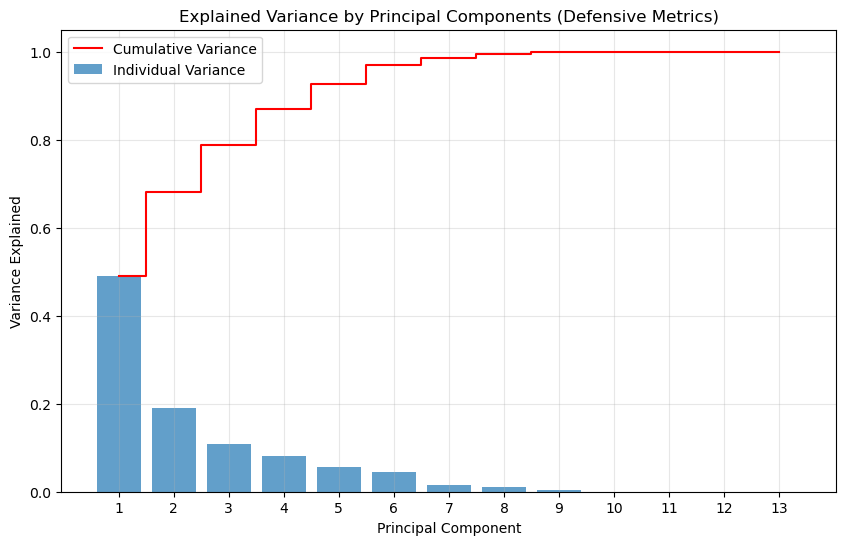


Variance Explained for Ranking Metrics:
   Principal Component  Explained Variance Ratio  Cumulative Variance
0                  PC1              7.273266e-01             0.727327
1                  PC2              1.425576e-01             0.869884
2                  PC3              6.805693e-02             0.937941
3                  PC4              3.514900e-02             0.973090
4                  PC5              1.960229e-02             0.992692
5                  PC6              5.073605e-03             0.997766
6                  PC7              2.065453e-03             0.999831
7                  PC8              1.685146e-04             1.000000
8                  PC9              5.301824e-33             1.000000
9                 PC10              1.505415e-33             1.000000
10                PC11              4.223939e-34             1.000000
11                PC12              3.046137e-34             1.000000
12                PC13              1.523186e-34 

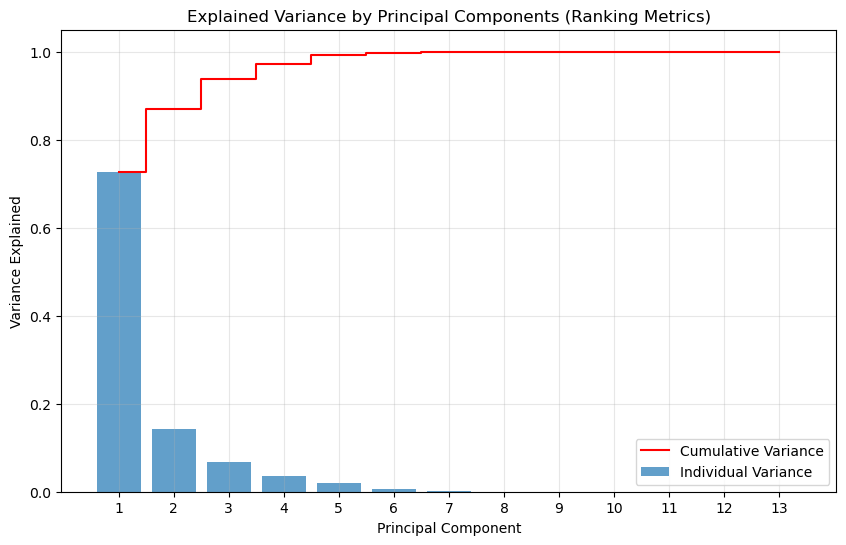

In [95]:
# Function to calculate and plot PCA variance
def calculate_pca_variance(data_scaled, data_name):
    # Fit PCA
    pca = PCA(n_components=data_scaled.shape[1])
    principal_components = pca.fit_transform(data_scaled)

    # Get explained variance ratio
    explained_variance_ratio = pca.explained_variance_ratio_

    # Calculate cumulative explained variance
    cumulative_variance = explained_variance_ratio.cumsum()

    # Create a DataFrame for better readability
    variance_df = pd.DataFrame({
        'Principal Component': [f"PC{i+1}" for i in range(len(explained_variance_ratio))],
        'Explained Variance Ratio': explained_variance_ratio,
        'Cumulative Variance': cumulative_variance
    })

    # Display variance table
    print(f"\nVariance Explained for {data_name}:")
    print(variance_df)

    # Plot the explained variance
    plt.figure(figsize=(10, 6))
    plt.bar(range(1, len(explained_variance_ratio)+1), explained_variance_ratio, alpha=0.7, label='Individual Variance')
    plt.step(range(1, len(cumulative_variance)+1), cumulative_variance, where='mid', label='Cumulative Variance', color='red')
    plt.title(f'Explained Variance by Principal Components ({data_name})')
    plt.xlabel('Principal Component')
    plt.ylabel('Variance Explained')
    plt.xticks(range(1, len(explained_variance_ratio)+1))
    plt.legend(loc='best')
    plt.grid(alpha=0.3)
    plt.show()

# Calculate PCA variance for Offensive Metrics
calculate_pca_variance(offensive_scaled, "Offensive Metrics")

# Calculate PCA variance for Defensive Metrics
calculate_pca_variance(defensive_scaled, "Defensive Metrics")

# Calculate PCA variance for Ranking Metrics
calculate_pca_variance(ranking_scaled, "Ranking Metrics")



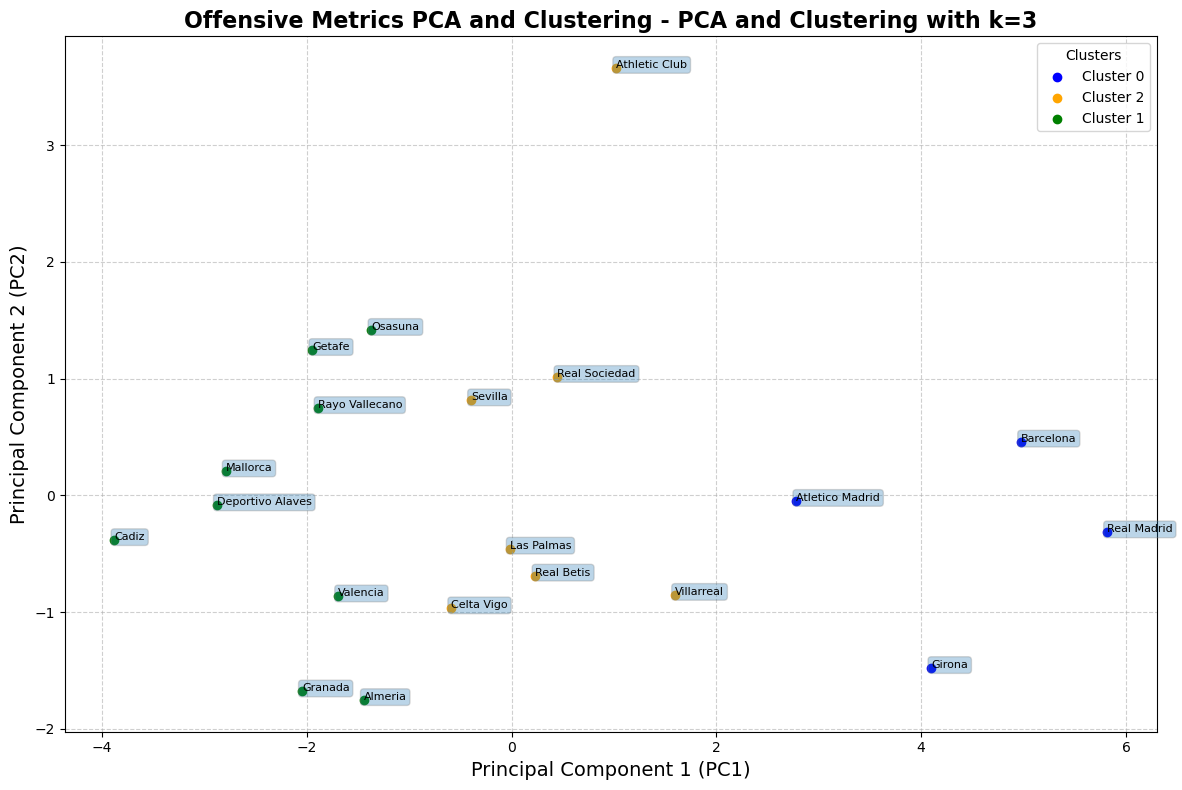

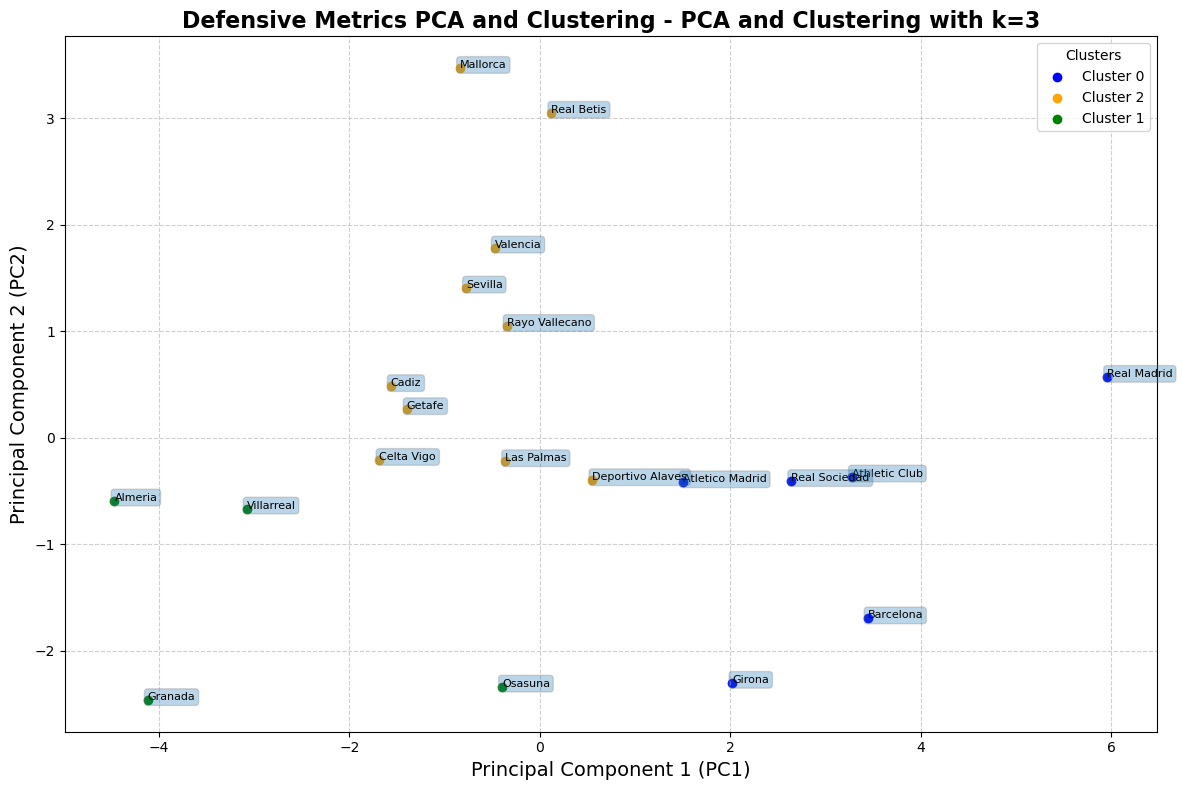

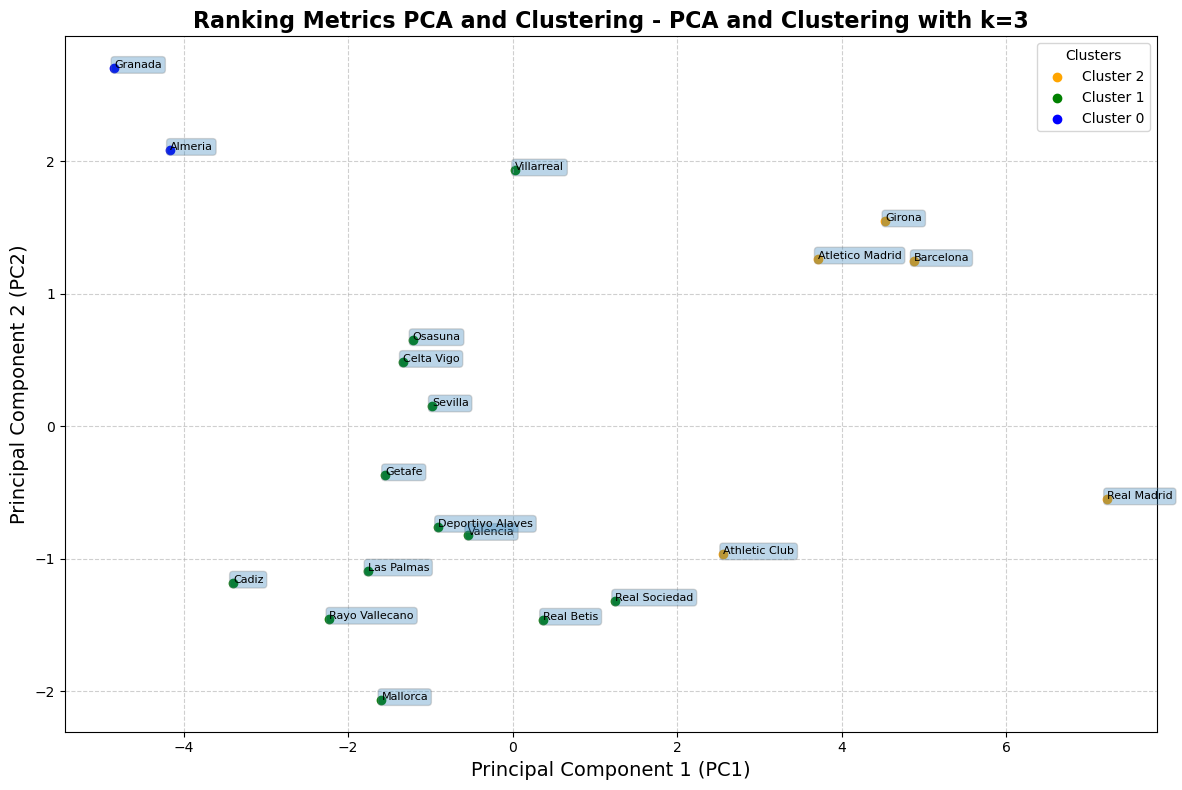

In [96]:
# Function to Apply PCA and Reduce Dimensions
def apply_pca_and_cluster(data_scaled, original_df, n_components, k, title):
    # Apply PCA
    pca = PCA(n_components=n_components)
    pca_components = pca.fit_transform(data_scaled)

    # Create a DataFrame for Principal Components
    pca_df = pd.DataFrame(
        data=pca_components,
        columns=[f"PC{i+1}" for i in range(n_components)],
        index=original_df['Team']  # Set Team names as the index
    )

    # Fit the K-Means model
    kmeans = KMeans(n_clusters=k, random_state=1)
    clusters = kmeans.fit_predict(pca_components)

    # Add the predicted clusters to the PCA DataFrame
    pca_df['Cluster'] = clusters

    # Scatter plot for first two principal components
    plt.figure(figsize=(12, 8))
    cluster_colors = ['blue', 'green', 'orange', 'purple', 'pink', 'yellow', 'cyan']
    for cluster in pca_df['Cluster'].unique():
        cluster_data = pca_df[pca_df['Cluster'] == cluster]
        plt.scatter(
            cluster_data['PC1'], cluster_data['PC2'], 
            label=f'Cluster {cluster}', 
            color=cluster_colors[cluster % len(cluster_colors)]
        )
    
    # Annotate each point with the team name
    for i, team in enumerate(pca_df.index):
        plt.text(
            pca_df['PC1'].iloc[i], 
            pca_df['PC2'].iloc[i], 
            team,
            fontsize=8,
            color='black',
            bbox=dict(boxstyle="round,pad=0.3", edgecolor='gray', alpha=0.3)
        )

    plt.title(f"{title} - PCA and Clustering with k={k}", fontsize=16, weight='bold')
    plt.xlabel("Principal Component 1 (PC1)", fontsize=14)
    plt.ylabel("Principal Component 2 (PC2)", fontsize=14)
    plt.legend(title='Clusters', fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

    return pca_df

# Apply PCA and Cluster for Offensive Metrics
pca_offensive_df = apply_pca_and_cluster(
    data_scaled=offensive_scaled,
    original_df=offensive_df_streamlined,
    n_components=2,  # Number of principal components
    k=3,  # Optimal k identified earlier
    title="Offensive Metrics PCA and Clustering"
)

# Apply PCA and Cluster for Defensive Metrics
pca_defensive_df = apply_pca_and_cluster(
    data_scaled=defensive_scaled,
    original_df=defensive_df_streamlined,
    n_components=2,  # Number of principal components
    k=3,  # Optimal k identified earlier
    title="Defensive Metrics PCA and Clustering"
)

# Apply PCA and Cluster for Ranking Metrics
pca_ranking_df = apply_pca_and_cluster(
    data_scaled=ranking_scaled,
    original_df=ranking_df_streamlined,
    n_components=2,  # Number of principal components
    k=3,  # Optimal k identified earlier
    title="Ranking Metrics PCA and Clustering"
)


## Match Data Time-Series Analysis

### Introduction
The match data provides an excellent opportunity to analyze La Liga games over time. By utilizing the `UTC Time` column, we can explore trends, patterns, and insights from a chronological perspective. 

### Key Transformations
1. **DateTime Conversion:** Convert the `UTC Time` column to a `datetime` object to enable time-based operations.
2. **Indexing by Time:** Set `UTC Time` as the index of the DataFrame to facilitate time-series analysis and visualizations.

### Purpose
The transformed data will allow us to:
- Investigate performance trends of teams over the season.
- Compare home and away results over time.
- Analyze scoring patterns across rounds.

### Next Steps
1. Transform the `UTC Time` column to a datetime format and set it as the index.
2. Use the updated DataFrame to derive insights based on temporal patterns in match results.


In [97]:
# File path for the dataset
file_path = "FIFA_datasets/laliga2023_34/Laliga_matches_23_24.csv"

# Read the dataset
matches_df = pd.read_csv(file_path)

# Display the first few rows to inspect the data
print("First 5 rows of the dataset:")
print(matches_df.head())

# Check for null values
print("\nNull values in the dataset:")
print(matches_df.isnull().sum())

# Ensure the Score column is split into Home Score and Away Score
if 'Score' in matches_df.columns:
    matches_df[['Home Score', 'Away Score']] = matches_df['Score'].str.split('_', expand=True).astype(int)

# Drop unnecessary columns for analysis if required
columns_to_drop = ['Finished', 'Started', 'Cancelled', 'Awarded', 'Match Status']
matches_df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

# Display the processed DataFrame

matches_df.head()
matches_df.tail()


First 5 rows of the dataset:
   Round  Round Name  Match ID      Home Team       Away Team  \
0      1           1   4205343        Almeria  Rayo Vallecano   
1      1           1   4205347        Sevilla        Valencia   
2      1           1   4205351  Real Sociedad          Girona   
3      1           1   4205348     Las Palmas        Mallorca   
4      1           1   4205344  Athletic Club     Real Madrid   

               UTC Time  Finished  Started  Cancelled  Awarded  Score  \
0  2023-08-11T17:30:00Z      True     True      False    False  0 _ 2   
1  2023-08-11T20:00:00Z      True     True      False    False    1_2   
2  2023-08-12T15:00:00Z      True     True      False    False    1_1   
3  2023-08-12T17:30:00Z      True     True      False    False    1_1   
4  2023-08-12T19:30:00Z      True     True      False    False  0 _ 2   

  Match Status  Unnamed: 12  
0    Full-Time          NaN  
1    Full-Time          NaN  
2    Full-Time          NaN  
3    Full-Time       

Round  Round Name  Match ID    Home Team         Away Team  \
375     38          38   4205721  Real Madrid        Real Betis   
376     38          38   4205715       Getafe          Mallorca   
377     38          38   4205714   Celta Vigo          Valencia   
378     38          38   4205722   Las Palmas  Deportivo Alaves   
379     38          38   4205720      Sevilla         Barcelona   

                 UTC Time  Score  Unnamed: 12  Home Score  Away Score  
375  2024-05-25T19:00:00Z  0 _ 0          NaN           0           0  
376  2024-05-26T12:00:00Z    1_2          NaN           1           2  
377  2024-05-26T14:15:00Z    2_2          NaN           2           2  
378  2024-05-26T14:15:00Z    1_1          NaN           1           1  
379  2024-05-26T19:05:00Z    1_2          NaN           1           2

In [98]:
matches_df.dtypes

Round            int64
Round Name       int64
Match ID         int64
Home Team       object
Away Team       object
UTC Time        object
Score           object
Unnamed: 12    float64
Home Score       int64
Away Score       int64
dtype: object

In [99]:
matches_df.columns

Index(['Round', 'Round Name', 'Match ID', 'Home Team', 'Away Team', 'UTC Time',
       'Score', 'Unnamed: 12', 'Home Score', 'Away Score'],
      dtype='object')

In [100]:
# Convert the 'UTC Time' column to a datetime object
matches_df['UTC Time'] = pd.to_datetime(matches_df['UTC Time'])

# Set the 'UTC Time' column as the index
matches_df.set_index('UTC Time', inplace=True)

# Verify the changes
print("\nDataFrame after setting 'UTC Time' as index:")
print(matches_df.head())
print("\nData types of the updated DataFrame:")
print(matches_df.dtypes)



DataFrame after setting 'UTC Time' as index:
                           Round  Round Name  Match ID      Home Team  \
UTC Time                                                                
2023-08-11 17:30:00+00:00      1           1   4205343        Almeria   
2023-08-11 20:00:00+00:00      1           1   4205347        Sevilla   
2023-08-12 15:00:00+00:00      1           1   4205351  Real Sociedad   
2023-08-12 17:30:00+00:00      1           1   4205348     Las Palmas   
2023-08-12 19:30:00+00:00      1           1   4205344  Athletic Club   

                                Away Team  Score  Unnamed: 12  Home Score  \
UTC Time                                                                    
2023-08-11 17:30:00+00:00  Rayo Vallecano  0 _ 2          NaN           0   
2023-08-11 20:00:00+00:00        Valencia    1_2          NaN           1   
2023-08-12 15:00:00+00:00          Girona    1_1          NaN           1   
2023-08-12 17:30:00+00:00        Mallorca    1_1         

In [101]:
# Drop the 'Round Name' column from the DataFrame
matches_df.drop(columns=['Round Name'], inplace=True)

# Display the updated DataFrame
matches_df


Round  Match ID      Home Team         Away Team  \
UTC Time                                                                      
2023-08-11 17:30:00+00:00      1   4205343        Almeria    Rayo Vallecano   
2023-08-11 20:00:00+00:00      1   4205347        Sevilla          Valencia   
2023-08-12 15:00:00+00:00      1   4205351  Real Sociedad            Girona   
2023-08-12 17:30:00+00:00      1   4205348     Las Palmas          Mallorca   
2023-08-12 19:30:00+00:00      1   4205344  Athletic Club       Real Madrid   
...                          ...       ...            ...               ...   
2024-05-25 19:00:00+00:00     38   4205721    Real Madrid        Real Betis   
2024-05-26 12:00:00+00:00     38   4205715         Getafe          Mallorca   
2024-05-26 14:15:00+00:00     38   4205714     Celta Vigo          Valencia   
2024-05-26 14:15:00+00:00     38   4205722     Las Palmas  Deportivo Alaves   
2024-05-26 19:05:00+00:00     38   4205720        Sevilla         Barcelona   

                           Score  Unnamed: 12  Home Score  Away Score  
UTC Time                                                               
2023-08-11 17:30:00+00:00  0 _ 2          NaN           0           2  
2023-08-11 20:00:00+00:00    1_2          NaN           1           2  
2023-08-12 15:00:00+00:00    1_1          NaN           1           1  
2023-08-12 17:30:00+00:00    1_1          NaN           1           1  
2023-08-12 19:30:00+00:00  0 _ 2          NaN           0           2  
...                          ...          ...         ...         ...  
2024-05-25 19:00:00+00:00  0 _ 0          NaN           0           0  
2024-05-26 12:00:00+00:00    1_2          NaN           1           2  
2024-05-26 14:15:00+00:00    2_2          NaN           2           2  
2024-05-26 14:15:00+00:00    1_1          NaN           1           1  
2024-05-26 19:05:00+00:00    1_2          NaN           1           2  

[380 rows x 8 columns]